## Jovian M.L Project (PUBG Finish Placement Prediction)

<img src="https://storage.googleapis.com/kaggle-media/competitions/PUBG/PUBG%20Inlay.jpg" height=500 width=500 />

You are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings.

What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do you need to be the top shot? Let's let the data do the talking!

#### Link to dataset: [HERE](https://www.kaggle.com/c/pubg-finish-placement-prediction/overview)

### Data Description

#### Features
- DBNOs - Number of enemy players knocked.

- assists - Number of enemy players this player damaged that were killed by teammates.

- boosts - Number of boost items used.

- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

- headshotKills - Number of enemy players killed with headshots.

- heals - Number of healing items used.

- Id - Player’s Id

- killPlace - Ranking in match of number of enemy players killed.

- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

- killStreaks - Max number of enemy players killed in a short amount of time.

- kills - Number of enemy players killed.

- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

- matchDuration - Duration of match in seconds.

- matchId - ID to identify match. There are no matches that are in both the training and testing set.

- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

- revives - Number of times this player revived teammates.

- rideDistance - Total distance traveled in vehicles measured in meters.

- roadKills - Number of kills while in a vehicle.

- swimDistance - Total distance traveled by swimming measured in meters.

- teamKills - Number of times this player killed a teammate.

- vehicleDestroys - Number of vehicles destroyed.

- walkDistance - Total distance traveled on foot measured in meters.

- weaponsAcquired - Number of weapons picked up.

- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

- numGroups - Number of groups we have data for in the match.

- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.


#### Target
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

### Since the target column is a continous value we can use Regression technique. But first we need to take a look at the data and perform EDA and other techniques as and when required.

In [1]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# Loading the datasets
train_df = pd.read_csv("train_V2.csv")
test_df = pd.read_csv("test_V2.csv")

print(f"Training data Shape: {train_df.shape}\nTest data shape: {test_df.shape}")

Training data Shape: (4446966, 29)
Test data shape: (1934174, 28)


In [3]:
# First five rows of the train data
train_df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0         0.00      0              0      0         60        1241      0   
1        91.47      0              0      0         57           0      0   
2        68.00      0              0      0         47           0      0   
3        32.90      0              0      0         75           0      0   
4       100.00      0              0      0         45           0      1   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0         0.00           1306  squad-fpp        28         26   
1            0         0.00           1777  squad-fpp        26         25   
2            0         0.00           1318        duo        50         47   
3            0         0.00           1436  squad-fpp        31         30   
4            1        58.53           1424   solo-fpp        97         95   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0          -1        0        0.0000          0          0.00          0   
1        1484        0        0.0045          0         11.04          0   
2        1491        0        0.0000          0          0.00          0   
3        1408        0        0.0000          0          0.00          0   
4        1560        0        0.0000          0          0.00          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                0        244.80                1       1466        0.4444  
1                0       1434.00                5          0        0.6400  
2                0        161.80                2          0        0.7755  
3                0        202.70                3          0        0.1667  
4                0         49.75                2          0        0.1875

In [4]:
# First five rows of the test data
test_df.head()

Id         groupId         matchId  assists  boosts  \
0  9329eb41e215eb  676b23c24e70d6  45b576ab7daa7f        0       0   
1  639bd0dcd7bda8  430933124148dd  42a9a0b906c928        0       4   
2  63d5c8ef8dfe91  0b45f5db20ba99  87e7e4477a048e        1       0   
3  cf5b81422591d1  b7497dbdc77f4a  1b9a94f1af67f1        0       0   
4  ee6a295187ba21  6604ce20a1d230  40754a93016066        0       4   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0        51.46      0              0      0         73           0      0   
1       179.10      0              0      2         11           0      2   
2        23.40      0              0      4         49           0      0   
3        65.52      0              0      0         54           0      0   
4       330.20      1              2      1          7           0      3   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0         0.00           1884  squad-fpp        28         28   
1            1       361.90           1811    duo-fpp        48         47   
2            0         0.00           1793  squad-fpp        28         27   
3            0         0.00           1834    duo-fpp        45         44   
4            1        60.06           1326  squad-fpp        28         27   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0        1500        0           0.0          0           0.0          0   
1        1503        2        4669.0          0           0.0          0   
2        1565        0           0.0          0           0.0          0   
3        1465        0           0.0          0           0.0          0   
4        1480        1           0.0          0           0.0          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  
0                0         588.0                1          0  
1                0        2017.0                6          0  
2                0         787.8                4          0  
3                0        1812.0                3          0  
4                0        2963.0                4          0

### Approach Map

- Exploratory Data Analysis

- Outlier removal

- Feature Engineering

- Model selection, training & prediction

## 1. Exploratory Data Analysis

In [5]:
# Get dtypes of all columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### We can observe that majority of the columns are either of type Int or Float. 

In [6]:
# Statistical info about the numeric columns
train_df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  4.446966e+06   4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   2.299759e+01   1.579506e+03  4.450467e+01  4.300759e+01  8.920105e+02   
std    5.097262e+01   2.587399e+02  2.382811e+01  2.328949e+01  7.366478e+02   
min    0.000000e+00   9.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.132000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.094000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.910000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.646590e-01  6.061157e+02  3.496091e-03  4.509322e+00  2.386841e-02   
std    4.721671e-01  1.498344e+03  7.337297e-02  3.050220e+01  1.673935e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03  1.200000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     4.446966e+06  4.446966e+06     4.446966e+06  4.446966e+06   
mean      7.918208e-03  1.154218e+03     3.660488e+00  6.064601e+02   
std       9.261157e-02  1.183497e+03     2.456544e+00  7.397004e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.551000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.856000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.976000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.013000e+03   

       winPlacePerc  
count  4.446965e+06  
mean   4.728216e-01  
std    3.074050e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

In [7]:
# NaN values count
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### Only one missing value so we can choose to drop this row.

In [8]:
# Dropping the only row with missing value
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

### Since there are only 4 object type columns we can explore them first.

In [9]:
object_types = train_df.select_dtypes("object").columns.to_list()
object_types

['Id', 'groupId', 'matchId', 'matchType']

In [10]:
# Working with different IDs
for ids in object_types[:-1]:
    print(f"Unique points in {ids} column are {train_df[ids].nunique()}")

Unique points in Id column are 4446965
Unique points in groupId column are 2026744
Unique points in matchId column are 47964


### Some Insights from the above operation:

- Looks like ID column has only unique value present and that makes sense as each player is assigned a unique "PlayerID" in the game.

- GroupID is almost the half of the PlayerID which may point to the fact that most players like to play group matches

In [11]:
# Lets look at the last "matchType" column
print(f"There are {train_df['matchType'].nunique()} categories in the Match type column")

There are 16 categories in the Match type column


In [12]:
# Value count of each category
train_df["matchType"].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

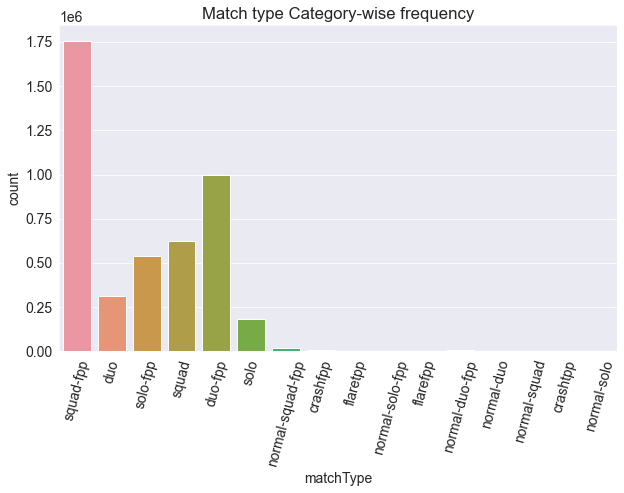

In [13]:
# Visualization of the above data
sns.countplot(x="matchType", data=train_df)
plt.title("Match type Category-wise frequency")
plt.xticks(rotation=75)
plt.show()

### As mentioned above looks like most of the players like to play squad matches. And we can also observe that the present 16 categories can be narrowed down to just 3 categories namely:

- Squad

- Duo 

- Solo

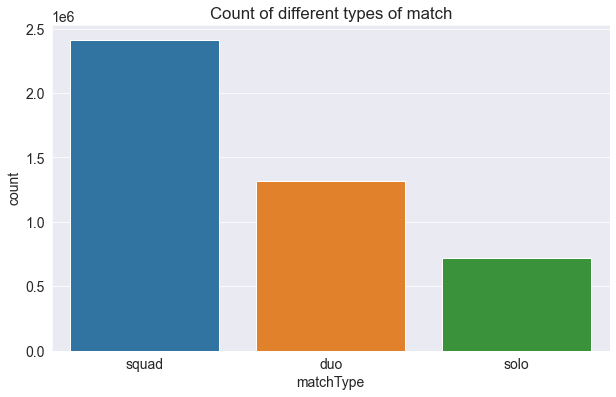

In [14]:
# Narrowing the present 16 categories to 3 categories
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'squad'
train_df['matchType'] = train_df['matchType'].apply(mapper)
sns.countplot(train_df['matchType'])
plt.title('Count of different types of match')
plt.show()

In [15]:
# Applying the same to test set
test_df["matchType"] = test_df["matchType"].apply(mapper)
test_df.head()

Id         groupId         matchId  assists  boosts  \
0  9329eb41e215eb  676b23c24e70d6  45b576ab7daa7f        0       0   
1  639bd0dcd7bda8  430933124148dd  42a9a0b906c928        0       4   
2  63d5c8ef8dfe91  0b45f5db20ba99  87e7e4477a048e        1       0   
3  cf5b81422591d1  b7497dbdc77f4a  1b9a94f1af67f1        0       0   
4  ee6a295187ba21  6604ce20a1d230  40754a93016066        0       4   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0        51.46      0              0      0         73           0      0   
1       179.10      0              0      2         11           0      2   
2        23.40      0              0      4         49           0      0   
3        65.52      0              0      0         54           0      0   
4       330.20      1              2      1          7           0      3   

   killStreaks  longestKill  matchDuration matchType  maxPlace  numGroups  \
0            0         0.00           1884     squad        28         28   
1            1       361.90           1811       duo        48         47   
2            0         0.00           1793     squad        28         27   
3            0         0.00           1834       duo        45         44   
4            1        60.06           1326     squad        28         27   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0        1500        0           0.0          0           0.0          0   
1        1503        2        4669.0          0           0.0          0   
2        1565        0           0.0          0           0.0          0   
3        1465        0           0.0          0           0.0          0   
4        1480        1           0.0          0           0.0          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  
0                0         588.0                1          0  
1                0        2017.0                6          0  
2                0         787.8                4          0  
3                0        1812.0                3          0  
4                0        2963.0                4          0

### Exploring the numeric columns

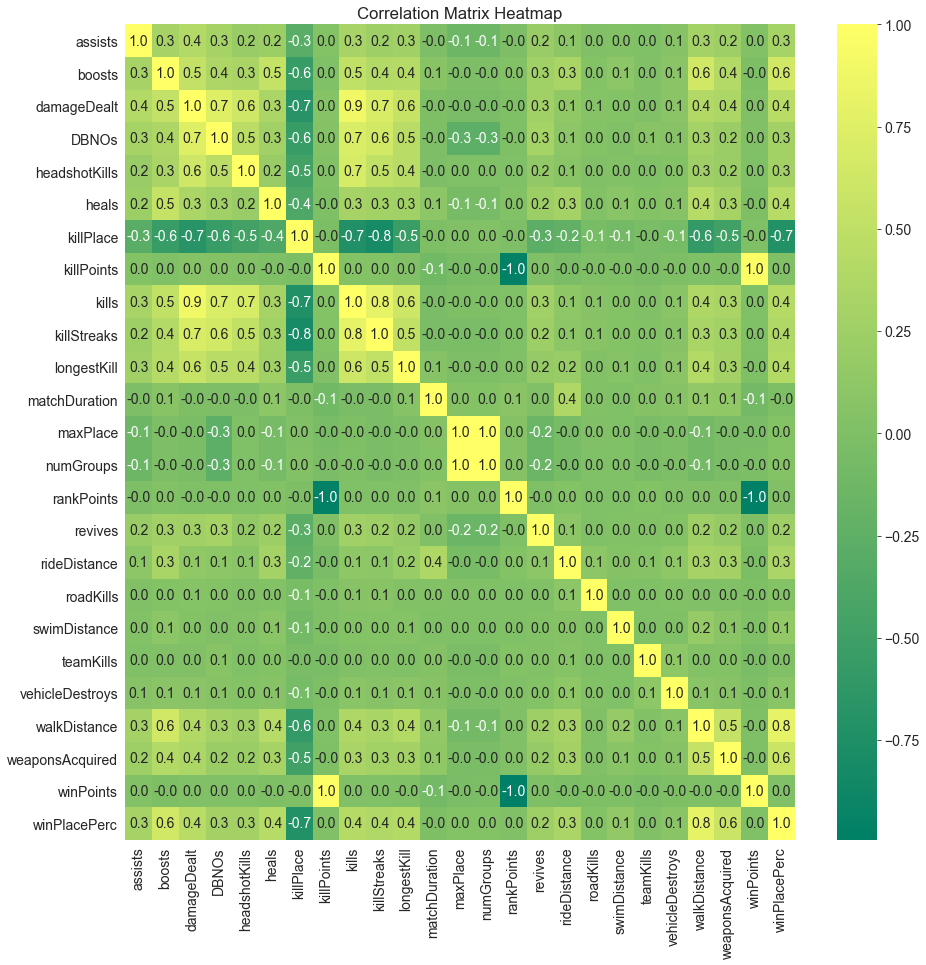

In [16]:
# Let's visualize the correlation of the features with target
plt.figure(figsize=(15, 15))

correlation = train_df.corr()
sns.heatmap(correlation, annot=True, fmt="0.1f", cmap="summer")
plt.title("Correlation Matrix Heatmap")
plt.show()

### From the above heatmap we can infer the following:

- **kills** has a strong positive correlation with win %age.

- **boosts** has a strong positive correlation with win %age.

- **weaponsAcquired** has a nearly perfect correlation with win %age.

- **walkDistance** has a perfect correlation with win %age.

- **heal** has a strong positive correlation with win %age.

- **damageDealt** has a strong positive correlation with win %age.

Let's analyze each one of them.

#### Analyzing the Kills

In [17]:

print("The average kill by a player are:", train_df["kills"].mean())
print(f"The minimum kills by a player are: {train_df['kills'].min()} and maximum kills are: {train_df['kills'].max()}")

The average kill by a player are: 0.9247835321393355
The minimum kills by a player are: 0 and maximum kills are: 72


In [18]:
# Unique kills value
train_df["kills"].unique()

array([ 0,  1,  4,  2,  9,  3,  5,  6,  8,  7, 14, 13, 15, 12, 21, 11, 10,
       17, 20, 24, 18, 16, 22, 19, 23, 35, 31, 27, 25, 48, 42, 30, 26, 65,
       39, 33, 28, 29, 34, 57, 55, 56, 36, 38, 37, 44, 66, 41, 50, 53, 43,
       32, 40, 47, 45, 46, 49, 72])

In [19]:
train_df["kills"].value_counts()

0     2529721
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8       12779
9        7644
10       4599
11       2799
12       1755
13       1137
14        757
15        484
16        325
17        234
18        165
19        112
20        109
22         77
21         70
23         47
24         44
25         27
26         27
28         22
27         21
30         13
29         13
31         13
33         12
36          8
38          7
35          7
34          5
41          5
37          5
32          4
53          4
40          4
39          4
43          3
42          3
56          2
55          2
44          2
46          2
57          2
49          1
45          1
47          1
48          1
50          1
66          1
65          1
72          1
Name: kills, dtype: int64

### We can see that there are quite a lot of values of no. of kills. To visualize the number of kills we can map the no kills with a value greater than 6 to something such "Greater than 7" since most of the kills are in the range of 0 to 7.

In [20]:
kills = train_df["kills"].copy()
kills = kills.apply(lambda x: "Greater than 7" if x > 6 else x)
kills.value_counts()

0                 2529721
1                  928079
2                  472466
3                  232441
4                  124543
5                   66577
Greater than 7      55178
6                   37960
Name: kills, dtype: int64

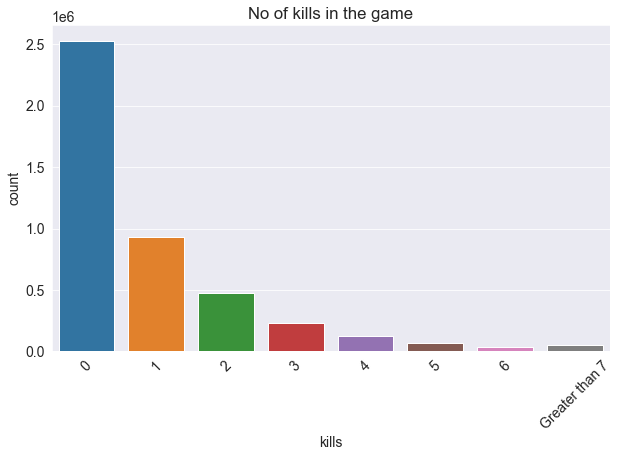

In [21]:
# Visualizing the kills count
sns.countplot(kills.astype(str).sort_values())
plt.title("No of kills in the game")
plt.xticks(rotation=45)
plt.show()

### If we take no of kills as the main factor in winning the game then it seems that most of the players are quite average at playing the game.

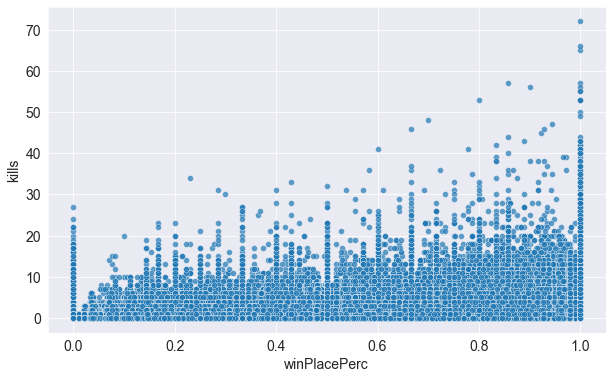

In [22]:
sns.scatterplot(x="winPlacePerc", y="kills", data=train_df, alpha=0.7)
plt.show()

### We can look at the longestKill column as well. Typically, long kills are made using Snipers that too within a range of 800 meters. So we can drop those players having a longKill value of greater than 800 meters as they might be playing with some hacks and mods

In [23]:
# Players who killed at a range greater than 800 meters
longest = train_df[train_df["longestKill"] > 800]
longest

Id         groupId         matchId  assists  boosts  \
49933    8d84a760b76634  dcbeb664940a34  ecf0c4f12fbd6a        0       4   
92928    f5d47d6ec321b9  431afc1353741e  5d39d5163ba750        1       6   
118093   f9d14251d99ecf  c99533f640ece9  c8a16bfa406795        0       5   
144856   0d65331cbe09bf  f50d852ff41035  6575f2a4ef9fd4        5       0   
156358   82f7f4534e0766  b1a0516e6aec44  0cbd7e25798b72        1       2   
...                 ...             ...             ...      ...     ...   
4373471  1876c765ff4ff3  6296ecce22908a  d936b50e8982e4        0       1   
4374964  c9abee78d33001  599e4d71f5900a  ed97db763135cd        0       0   
4387093  6ac48c46052c4e  5f19b8e1bc2ecd  b82d57cc24f3e1        0       5   
4395138  da72e882ffa6cb  852025e58ea9ca  cbaa9f6e500481        0       5   
4402045  bf78ab5077a3fe  117c6026b1a37b  b213a82797bad7        1       7   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
49933         1550.0     14             10      2          1           0   
92928         1367.0      6              1      3          1        1496   
118093        2267.0      0             14      3          1           0   
144856         869.6      0              3      0          8           0   
156358        1461.0     14              4      1          2           0   
...              ...    ...            ...    ...        ...         ...   
4373471        333.4      2              0      3          8           0   
4374964        200.0      3              1      0         34           0   
4387093        459.5      3              1      3         24           0   
4395138       1111.0      8              6      3          1        1878   
4402045        871.4      7              9      7          1        1000   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
49933       16            4        953.6           1835     squad        29   
92928       10            2        898.3           1775     squad        29   
118093      23            2        873.4           1773      solo        97   
144856      10            2        964.5            595     squad         5   
156358       8            4        856.1           1787     squad        28   
...        ...          ...          ...            ...       ...       ...   
4373471      3            1        828.2           1987     squad        29   
4374964      1            1        893.5           1732     squad        27   
4387093      1            1        859.7           1809     squad        25   
4395138      7            3        866.0           1874     squad        30   
4402045     11            2        873.9           1777     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
49933           28        1573        4        5171.0          0   
92928           27          -1        0        6265.0          0   
118093          94        1500        0        2211.0          0   
144856           5        1500        0           0.0          0   
156358          27        1491        1        1708.0          0   
...            ...         ...      ...           ...        ...   
4373471         27        1479        0        3817.0          0   
4374964         25        1427        0           0.0          0   
4387093         24        1714        0        4131.0          0   
4395138         27          -1        0        1572.0          0   
4402045         26          -1        0        3634.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
49933             0.0          0                0        3390.0   
92928             0.0          0                0        2400.0   
118093          417.8          0                0        3324.0   
144856            0.0          0                0         241.2   
156358            0.0          0                0        1712.0   
...               ...      

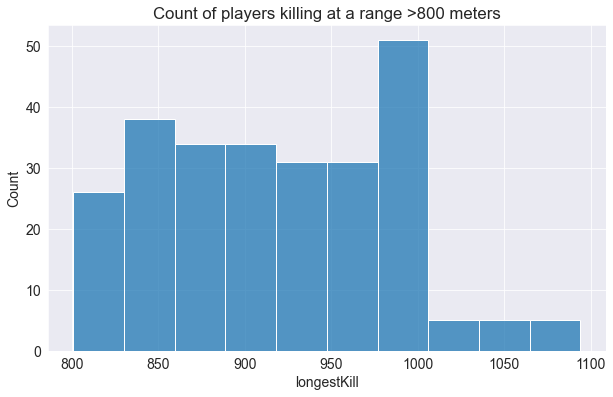

In [24]:
# Visualizing long shots by hackers
sns.histplot(longest["longestKill"], bins=10)
plt.title("Count of players killing at a range >800 meters")
plt.show()

### From the above visualization it can be concluded that these players are hackers. So we can choose to drop them from our dataframe

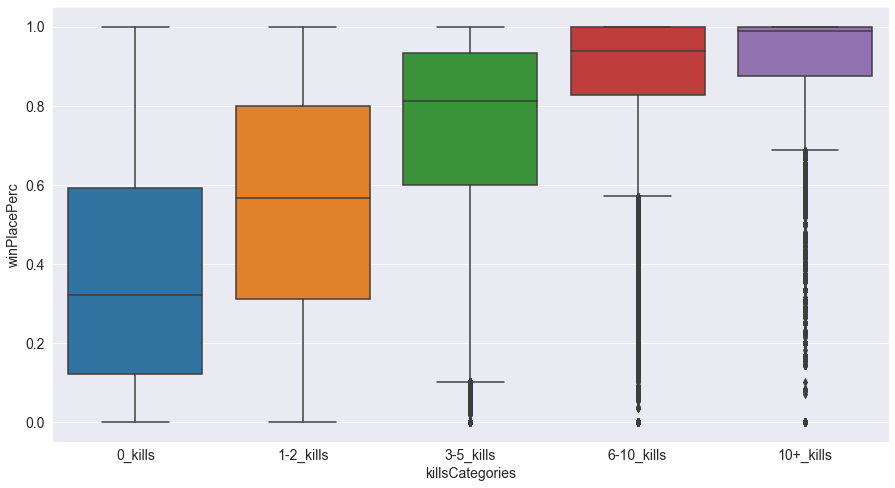

In [25]:
# Boxplot of no of kills.
kills = train_df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=[
    '0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

### Though there are some outliers in the kills column but it seems that kills is correlated with win %age.

#### Analyzing boosts column

In [26]:
print("Average boost items used by players:", train_df["boosts"].mean())
print(f"Minimum no. of boosts item used are {train_df['boosts'].min()} and maximum are {train_df['boosts'].max()}")

Average boost items used by players: 1.1069079698176172
Minimum no. of boosts item used are 0 and maximum are 33


In [27]:
train_df["boosts"].value_counts()

0     2521323
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
Name: boosts, dtype: int64

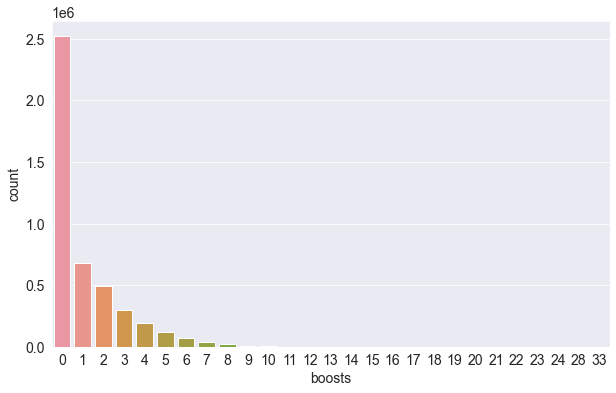

In [28]:
# Visualizing boosts
sns.countplot(train_df["boosts"].sort_values(ascending=False))
plt.show()

### The maximum no. of boost items used by players is 0, which means that either the players died too early in the match or if they win without using any boosts then most probably they are hackers.

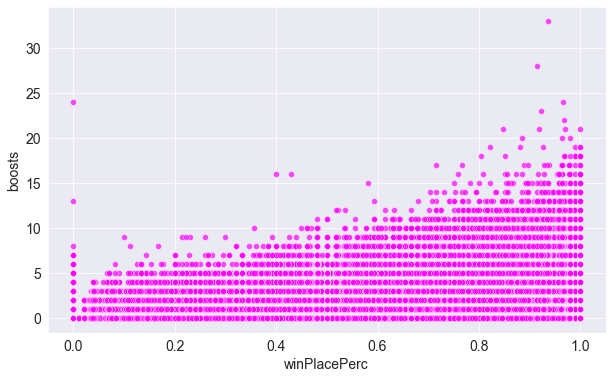

In [29]:
sns.scatterplot(x="winPlacePerc", y="boosts", data=train_df, color="magenta", alpha=0.7)
plt.show()

#### Analyzing weaponsAcquired

In [30]:
print("The average number of weapons acquired by players are:", train_df["weaponsAcquired"].mean())
print(f"Minimum no. of weapons acquired are {train_df['weaponsAcquired'].min()} and maximum are {train_df['weaponsAcquired'].max()}")

The average number of weapons acquired by players are: 3.6604884454903512
Minimum no. of weapons acquired are 0 and maximum are 236


### The maximum value of weapons acquired is 236 which is basically impossible in a single match. The min. number is 0 which tells us that the players died before acquiring any weapons.(i.e at the start of the match)

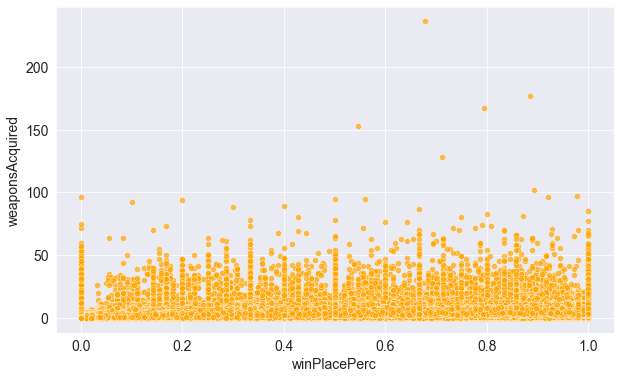

In [31]:
sns.scatterplot(x="winPlacePerc", y="weaponsAcquired", data=train_df, color="orange", alpha=0.7)
plt.show()

### Since each player start with no weapons and tries to acquire better weapons throughout the match, it can be concluded that the more the weapons acquired the more is the probability of winning. (Although there are some outliers needed to be taken care of).

In [32]:
# No weapons acquired but still won the game
no_weapons_won = train_df[(train_df["weaponsAcquired"] == 0) & (train_df["winPlacePerc"] == 1)]
no_weapons_won

Id         groupId         matchId  assists  boosts  \
3911     8e06afa8b6c61f  970d86b89397cc  3650d079552505        1       0   
29209    1ecccc0d40d2ad  790d46d8271a61  20e8aa96b37a9f        0       0   
47738    4fc5c02f7ed99c  0720e3ec0ca353  137c26d091cd37        0       0   
50523    577ca3678d0eef  e31144fbe91648  2071a6f3ed6dc1        0       0   
56378    3d1ca39fa3d4d2  8f6f9cd7172243  0c469db5341db1        0       0   
...                 ...             ...             ...      ...     ...   
4348079  282e54fe4f9905  8444572780d79e  e75a89353f529e        0       0   
4384705  88d1612b48297e  25d4fa128a6787  997e80d166eeb5        0       0   
4390623  b1c515eb9affb2  4006356e80d522  ea01d7450df806        0       0   
4415629  b7ee2f1066d068  7f8d9336c687f5  a16ad8d6224965        0       0   
4430451  69f2d577afb916  1ca82eb3229fe3  8b1af8b54b0edb        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
3911           12.96      0              0      0         39        1000   
29209           0.00      0              0      0         37           0   
47738           0.00      0              0      0         37           0   
50523           0.00      0              0      0         50           0   
56378          48.97      0              0      0         37        1073   
...              ...    ...            ...    ...        ...         ...   
4348079         0.00      0              0      0         48        1277   
4384705         0.00      0              0      0         37           0   
4390623         0.00      0              0      0         42           0   
4415629        92.57      1              0      0         19           0   
4430451         0.00      0              0      0          2           0   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
3911         0            0        0.000           1923     squad        29   
29209        0            0        0.000           1908     squad        26   
47738        0            0        0.000           1960     squad        28   
50523        0            0        0.000           1355     squad        26   
56378        0            0        0.000           1802     squad        26   
...        ...          ...          ...            ...       ...       ...   
4348079      0            0        0.000           1443     squad        29   
4384705      0            0        0.000           1799     squad        29   
4390623      0            0        0.000           1457     squad        26   
4415629      1            1        5.036           1865     squad        26   
4430451      0            0        0.000           1808      solo        18   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
3911            29          -1        0           0.0          0   
29209           26        1572        0           0.0          0   
47738           26        1644        0           0.0          0   
50523           25        1482        0           0.0          0   
56378           26          -1        0        2282.0          0   
...            ...         ...      ...           ...        ...   
4348079         28          -1        0           0.0          0   
4384705         27        1496        0           0.0          0   
4390623         26        1500        0           0.0          0   
4415629         26        1500        0        2028.0          1   
4430451          2        1500        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
3911              0.0          0                0         18.88   
29209             0.0          0                0        167.50   
47738             0.0          0                0        184.50   
50523             0.0          0                0          0.28   
56378             0.0          0                0        248.80   
...               ...      

### We can observe that there are around 200 players who didn't even use a weapon but still managed to win the game. Either they were sitting at a corner through out the game or they are fraudsters. 

#### Analyzing walk distance

In [33]:
print(f"The average walk distance is {train_df['walkDistance'].mean()} meters.")

The average walk distance is 1154.2181186480893 meters.


In [34]:
train_df["walkDistance"].value_counts()

0.0000       99602
1007.0000      955
1098.0000      945
1047.0000      939
1036.0000      934
             ...  
0.8005           1
0.3570           1
7935.0000        1
0.8721           1
0.9661           1
Name: walkDistance, Length: 38599, dtype: int64

### About 99600 players walked 0 meters which means that they either died at the very start or they got disconnected from the game.

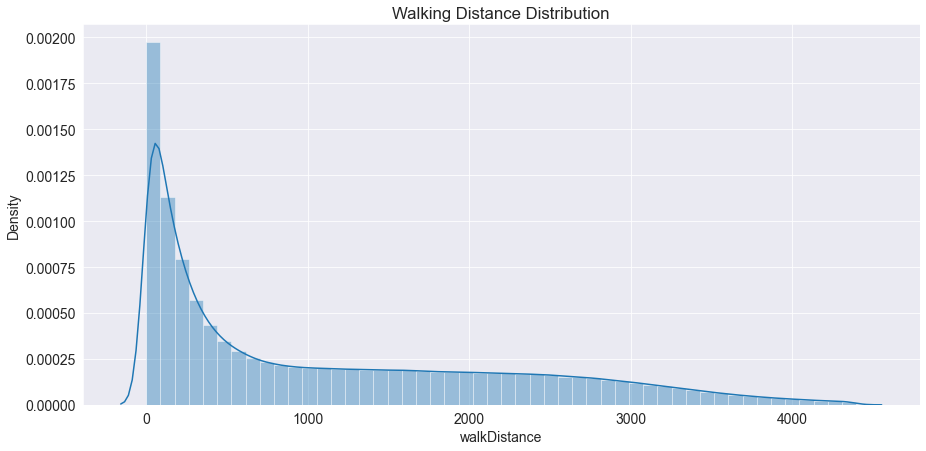

In [35]:
# Visualizing walk distance
data = train_df[train_df['walkDistance'] < train_df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.title("Walking Distance Distribution")
sns.distplot(data['walkDistance'])
plt.show()

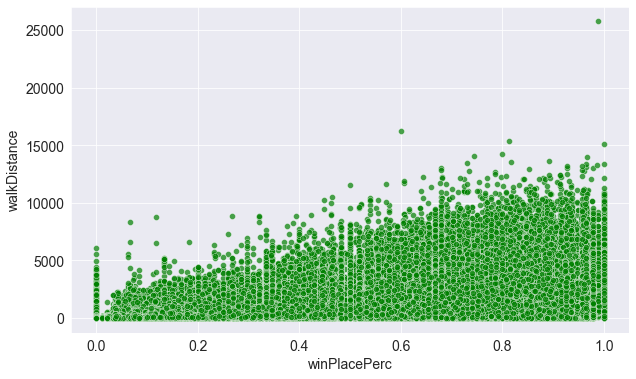

In [36]:
sns.scatterplot(x="winPlacePerc", y="walkDistance", data=train_df, color="green", alpha=0.7)
plt.show()

### We can observe that we also have swimDistance and rideDistance. Combining all these 3 distances we can derive a new column. Theoretically, if a player has travelled a lot of distance then there are high chances that the player may end up winning the match.

In [37]:
train_df["totalDistance"] = train_df["walkDistance"] + train_df["rideDistance"] + train_df["swimDistance"]
train_df["totalDistance"].head()

0     244.8000
1    1445.0445
2     161.8000
3     202.7000
4      49.7500
Name: totalDistance, dtype: float64

In [38]:
test_df["totalDistance"] = test_df["walkDistance"] + test_df["rideDistance"] + test_df["swimDistance"]
test_df["totalDistance"].head()

0     588.0
1    6686.0
2     787.8
3    1812.0
4    2963.0
Name: totalDistance, dtype: float64

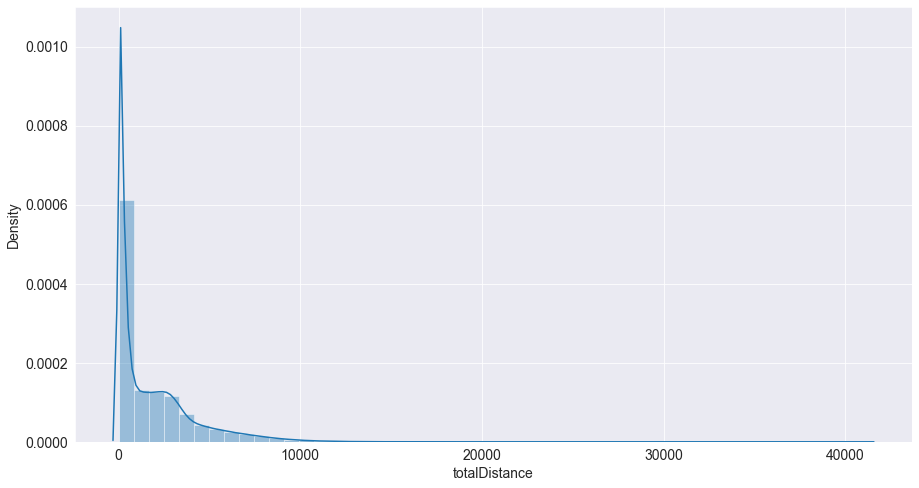

In [39]:
plt.figure(figsize=(15, 8))
sns.distplot(train_df["totalDistance"])
plt.show()

### To win a game in a game like PUBG, one has to keep moving from one place to another and stay inside the safe zone. If player managed to win a game after covering covering a very minimal distance, then it can be concluded that either they were camping or they are hackers.

In [40]:
minimal_movement = train_df[(train_df["totalDistance"] <= 350) & (train_df["winPlacePerc"]) == 1]
minimal_movement

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
5        ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
...                 ...             ...             ...      ...     ...   
4446943  0f0dd3fe907cef  5f251817449ae7  cf837481bd01f3        0       0   
4446945  e8b6ed3ec93a76  3e5b779bd7cf12  95e5611e58f4d5        0       0   
4446951  0381eae18c429f  c0df2e78ccce86  be06c0c5f9a47e        0       0   
4446959  d29bfa313ad766  ac3f1b4a56e5ad  2f3b1af94739b3        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0               0.00      0              0      0         60        1241   
2              68.00      0              0      0         47           0   
3              32.90      0              0      0         75           0   
4             100.00      0              0      0         45           0   
5             100.00      1              1      0         44           0   
...              ...    ...            ...    ...        ...         ...   
4446943         0.00      0              0      0         82           0   
4446945         0.00      0              0      0         81           0   
4446951         0.00      0              0      0         85           0   
4446959        22.68      0              0      0         89           0   
4446962        44.15      0              0      0         69           0   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
0            0            0         0.00           1306     squad        28   
2            0            0         0.00           1318       duo        50   
3            0            0         0.00           1436     squad        31   
4            1            1        58.53           1424      solo        97   
5            1            1        18.44           1395     squad        28   
...        ...          ...          ...            ...       ...       ...   
4446943      0            0         0.00           1365     squad        28   
4446945      0            0         0.00           1340       duo        49   
4446951      0            0         0.00           1344     squad        31   
4446959      0            0         0.00           1456      solo        96   
4446962      0            0         0.00           1435      solo        93   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0           0.0          0   
2               47        1491        0           0.0          0   
3               30        1408        0           0.0          0   
4               95        1560        0           0.0          0   
5               28        1418        0           0.0          0   
...            ...         ...      ...           ...        ...   
4446943         27        1314        0           0.0          0   
4446945         48        1533        0           0.0          0   
4446951         31        1436        0           0.0          0   
4446959         95        1787        0           0.0          0   
4446962         93        1501        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                 0.0          0                0        244.80   
2                 0.0          0                0        161.80   
3                 0.0          0                0        202.70   
4                 0.0          0                0         49.75   
5                 0.0          0                0         34.70   
...               ...      

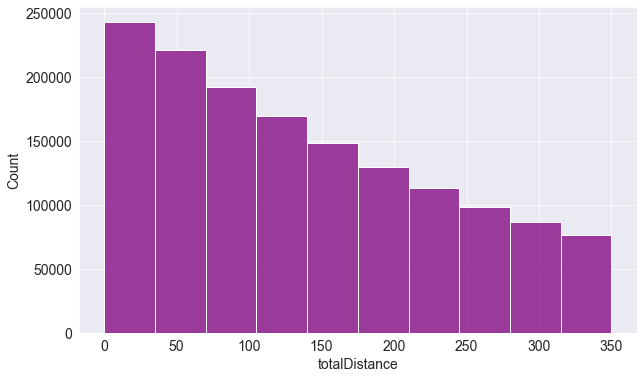

In [41]:
# Visualizing above data
sns.histplot(minimal_movement["totalDistance"], bins=10, color="purple")
plt.show()

### As we can observe from the above graph that there are quite a lot of players who covered minimal distance but still managed to win the match.

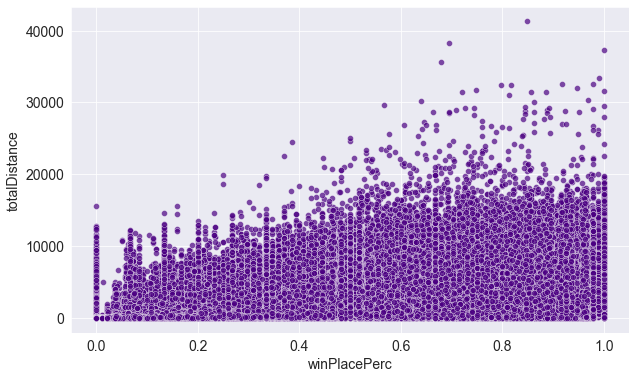

In [42]:
sns.scatterplot(x="winPlacePerc", y="totalDistance", data=train_df, color="indigo", alpha=0.7)
plt.show()

#### Analyzing Heals vs Boosts

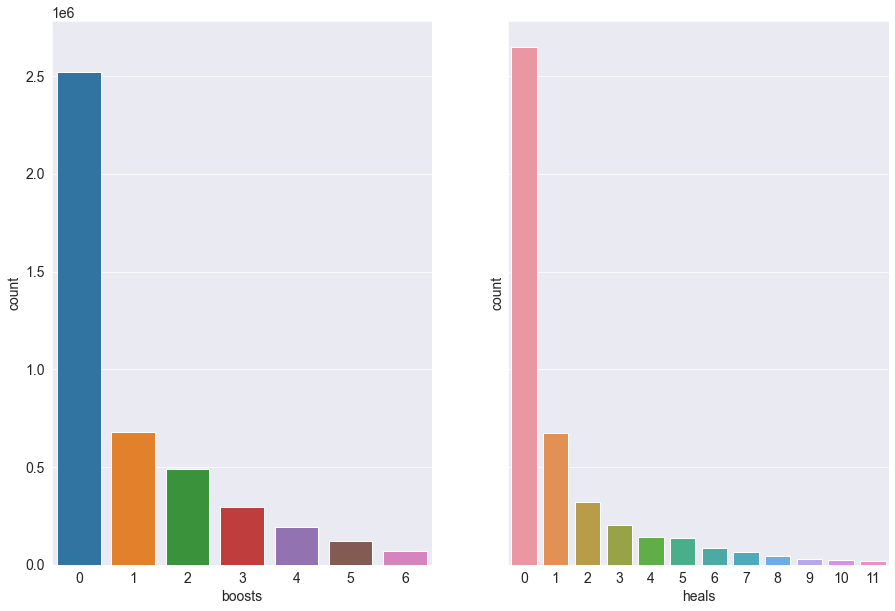

In [43]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
sns.countplot(x="boosts", data=train_df[train_df["boosts"] < train_df["boosts"].quantile(0.99)], ax=axes[0])
sns.countplot(x="heals", data=train_df[train_df["heals"] < train_df["heals"].quantile(0.99)], ax=axes[1])
plt.show()

### From the above visualization it can be concluded that most of the players use heals instead of boosts.

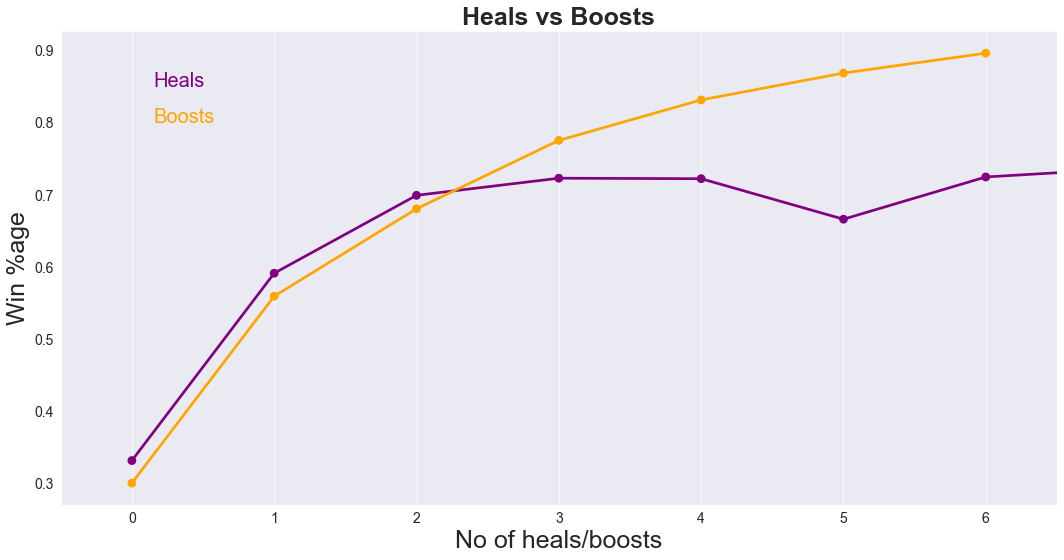

In [44]:
# Visualizing effect of boosts and heals on Win %age
data = train_df[train_df['heals'] < train_df['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

plt.figure(figsize=(15, 8))
sns.pointplot(x='heals', y='winPlacePerc', data=data, 
              color='purple', alpha=0.8)
sns.pointplot(x='boosts', y='winPlacePerc', data=data, 
              color='orange', alpha=0.8)
plt.title("Heals vs Boosts", fontdict={"size": 25, "weight": "bold"})
plt.xlabel("No of heals/boosts", fontdict={"size": 25})
plt.ylabel("Win %age", fontdict={"size": 25})
plt.text(0.15,0.85,'Heals', color='purple', fontsize = 20)
plt.text(0.15,0.80,'Boosts', color='orange', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

### From the above plot it can be stated that more the amount of heals and boosts a player has, the more is the probability of winning the match. 

#### Analyzing Damage dealt

In [45]:
print("The average damage dealt by players is:", train_df["damageDealt"].mean())
print(f"The minimum damage dealt is {train_df['damageDealt'].min()} and maximum is {train_df['damageDealt'].max()}")

The average damage dealt by players is: 130.717167293109
The minimum damage dealt is 0.0 and maximum is 6616.0


In [46]:
train_df["damageDealt"].value_counts()

0.0000      1238101
100.0000     262781
200.0000      62398
300.0000      13767
75.0000       12825
             ...   
9.9160            1
0.1798            1
1.6690            1
0.5956            1
0.8705            1
Name: damageDealt, Length: 29916, dtype: int64

### It can be seen that about 12 million players did not deal any damage, which means that either they got disconnected or died too soon in the match.

### Let's see if the players who dealt 0 damage won the game or not.

In [47]:
no_dmg_players = train_df[(train_df["damageDealt"] == 0) & (train_df["winPlacePerc"] == 1)]
no_dmg_players

Id         groupId         matchId  assists  boosts  \
2931     2aed71cfd36e7f  c6e699a280f2a6  bbbed73da58547        0       2   
3114     f485c54e3c9652  43b9495099889d  1f78e2436506db        0       0   
3571     871a7cf56b5e1a  744c69678bd2ba  2e3b45023dcb07        0       4   
3702     3fc123559fc935  5cef1df7ee3551  01aead02bb8901        0       0   
5288     0017d4c0ec3125  a97f0da93e4768  f6d508a32b64c4        0       2   
...                 ...             ...             ...      ...     ...   
4442844  230b33a6de6795  7cd904be84d463  f62ea2c15f1b94        0       1   
4442954  2c34305605efb1  7cd5095fac61e1  25b5de34226272        0       0   
4443248  120b7d2d32663f  b70109a45eb127  6db87452a2db21        0       0   
4443682  7d365e5d1b0e28  985be779a08d65  1ceae175e4f52b        1       5   
4444195  c266b659144a2e  4b44108012b583  85159ce05f601f        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2931             0.0      0              0      0         46        1414   
3114             0.0      0              0      0         38           0   
3571             0.0      0              0      5         40           0   
3702             0.0      0              0      0          1           0   
5288             0.0      0              0     10         44           0   
...              ...    ...            ...    ...        ...         ...   
4442844          0.0      0              0      0         32           0   
4442954          0.0      0              0      0         28           0   
4443248          0.0      0              0      0          2           0   
4443682          0.0      0              0      2         37        1030   
4444195          0.0      0              0      5         43        1350   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
2931         0            0          0.0           1383     squad        29   
3114         0            0          0.0           1440     squad        25   
3571         0            0          0.0           1988     squad        29   
3702         0            0          0.0           1808      solo        20   
5288         0            0          0.0           1438     squad        31   
...        ...          ...          ...            ...       ...       ...   
4442844      0            0          0.0           1822     squad        25   
4442954      0            0          0.0           1981     squad        14   
4443248      0            0          0.0           1808      solo        17   
4443682      0            0          0.0           2001     squad        27   
4444195      0            0          0.0           1388     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
2931            28          -1        0           0.0          0   
3114            24        1509        0           0.0          0   
3571            28        1522        0        5631.0          0   
3702             2        1500        0           0.0          0   
5288            31        1500        0        2868.0          0   
...            ...         ...      ...           ...        ...   
4442844         25        1361        0           0.0          0   
4442954         14        1500        0           0.0          0   
4443248          2        1500        0           0.0          0   
4443682         26          -1        2         880.1          0   
4444195         26          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
2931           0.0000          0                0       2854.00   
3114           0.0000          0                0         18.65   
3571           0.0000          0                1       2440.00   
3702           0.0000          0                0          0.00   
5288           0.0000          0                0       1385.00   
...               ...      

In [48]:
print("Average kill points of above data:", no_dmg_players["killPoints"].mean())

Average kill points of above data: 430.8463312368973


### We can see that the above players have dealt 0 damage but they still some of them have killPoints (even without kiling anyone?). And the average kill points comes out to be 430.

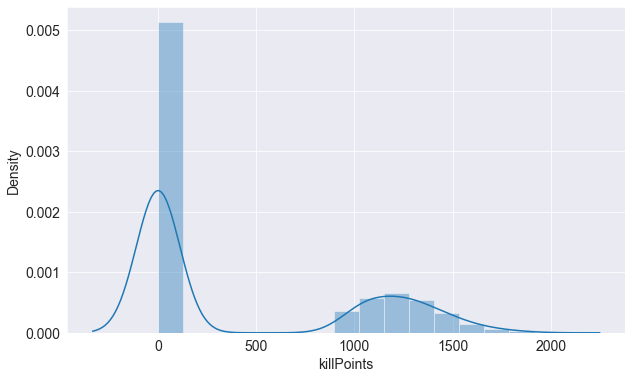

In [49]:
# Visualizing the above data
sns.distplot(no_dmg_players["killPoints"])
plt.show()

## 2. Outlier Removal

### From the above data analysis, we can drop out the shady/highly unlikely data points.

#### Shady/Unlikely data points

- Longest kills of >800 meters.

- Winning without boosts and heals.

- Travelling long distances by foot without killing anyone.

- Acquiring large number of weapons and killing more than 35 players. (Sign of hackers)

- Gaining high number of kills without covering much distance/ without movements.

- Gaining high no. of road kills.

- Travelling a total distance of 0 meters and still winning the game.


In [50]:
to_drop = train_df[train_df["longestKill"] > 800]
train_df.drop(to_drop.index, inplace=True)
print(f"Dropped {len(to_drop)} entries of Longest kills >800 meters.")

Dropped 260 entries of Longest kills >800 meters.


In [51]:
train_df["heals"].mean(), train_df["boosts"].mean()

(1.3701046055450046, 1.106829663762269)

In [52]:
to_drop = train_df[(train_df["heals"] < 2) & (train_df["boosts"] < 2) & (train_df["winPlacePerc"] == 1)]
train_df.drop(to_drop.index, inplace=True)
print(f"Dropped {len(to_drop)} fraudsters winning with negligible boosts and heals.")

Dropped 15150 fraudsters winning with negligible boosts and heals.


In [53]:
train_df["walkDistance"].describe()

count    4.431555e+06
mean     1.150881e+03
std      1.181461e+03
min      0.000000e+00
25%      1.547000e+02
50%      6.817000e+02
75%      1.969000e+03
max      2.578000e+04
Name: walkDistance, dtype: float64

In [54]:
to_drop = train_df[(train_df["walkDistance"] > 2000) & (train_df["winPlacePerc"] == 1)]
train_df.drop(to_drop.index, inplace=True)
print(f"Dropped {len(to_drop)} players walking long distances without encountering any players.")

Dropped 102934 players walking long distances without encountering any players.


In [55]:
train_df[(train_df["weaponsAcquired"] > 30) & (train_df["kills"] > 30)].describe()

assists     boosts  damageDealt      DBNOs  headshotKills      heals  \
count  64.000000  64.000000    64.000000  64.000000      64.000000  64.000000   
mean    8.453125   0.593750  3857.484375   1.921875       9.437500   6.734375   
std     4.275919   1.779234   955.789809   7.549424       8.037363   6.801592   
min     2.000000   0.000000  2516.000000   0.000000       3.000000   0.000000   
25%     6.000000   0.000000  3122.000000   0.000000       6.000000   2.750000   
50%     8.000000   0.000000  3618.500000   0.000000       8.000000   4.000000   
75%    10.250000   0.000000  4322.750000   0.000000      11.000000   8.000000   
max    22.000000  10.000000  6616.000000  35.000000      64.000000  32.000000   

       killPlace   killPoints     kills  killStreaks  longestKill  \
count  64.000000    64.000000  64.00000    64.000000    64.000000   
mean    2.515625   343.750000  39.90625     3.765625   114.303125   
std     1.680818   478.713554   9.06015     1.433634    64.634792   
min     1.000000     0.000000  31.00000     2.000000    39.200000   
25%     1.000000     0.000000  33.00000     3.000000    71.877500   
50%     2.000000     0.000000  37.00000     3.000000    95.270000   
75%     3.000000  1000.000000  43.25000     4.000000   139.025000   
max     8.000000  1000.000000  72.00000     8.000000   354.000000   

       matchDuration   maxPlace  numGroups   rankPoints    revives  \
count      64.000000  64.000000  64.000000    64.000000  64.000000   
mean     1707.593750  13.718750  11.796875   984.078125   0.078125   
std       207.908002   7.488549   5.124419   718.483794   0.369671   
min      1034.000000   4.000000   4.000000    -1.000000   0.000000   
25%      1793.500000   8.000000   7.000000    -1.000000   0.000000   
50%      1798.000000  13.000000  11.000000  1500.000000   0.000000   
75%      1798.000000  16.000000  15.000000  1500.000000   0.000000   
max      1800.000000  37.000000  26.000000  1500.000000   2.000000   

       rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
count     64.000000       64.0          64.0  64.000000             64.0   
mean     503.315937        0.0           0.0   0.078125              0.0   
std      950.185560        0.0           0.0   0.270490              0.0   
min        0.000000        0.0           0.0   0.000000              0.0   
25%        0.000000        0.0           0.0   0.000000              0.0   
50%        0.000000        0.0           0.0   0.000000              0.0   
75%      954.575000        0.0           0.0   0.000000              0.0   
max     3689.000000        0.0           0.0   1.000000              0.0   

       walkDistance  weaponsAcquired    winPoints  winPlacePerc  totalDistance  
count     64.000000        64.000000    64.000000     64.000000      64.000000  
mean     585.130266        52.406250   515.625000      0.875650    1088.446203  
std      547.161143        13.404239   718.070331      0.159004    1372.678658  
min        0.000000        32.000000     0.000000      0.285700       0.000000  
25%      119.450000        40.750000     0.000000      0.824975     119.450000  
50%      346.150000        54.000000     0.000000      0.925850     346.150000  
75%     1072.000000        60.000000  1500.000000      1.000000    1956.250000  
max     2264.000000        89.000000  1500.000000      1.000000    4957.000000

In [56]:
to_drop = train_df[(train_df["weaponsAcquired"] > 30) & (train_df["kills"] > 30)]
train_df.drop(to_drop.index, inplace=True)
print(f"Dropped {len(to_drop)} players with highly unlikely weapons possession and kills.")

Dropped 64 players with highly unlikely weapons possession and kills.


In [57]:
# Drop travelling outliers/anomalities
to_drop_walk = train_df[(train_df['walkDistance'] == 0) & (train_df['rideDistance'] > 0) & (train_df['kills'] > 0)]
to_drop_ride = train_df[(train_df['rideDistance'] >= 25000) & (train_df['kills'] == 0)]
to_drop_swim = train_df[(train_df["swimDistance"] >= 1500) & (train_df["kills"] == 0)]
to_drop_total = train_df[(train_df["totalDistance"] == 0) & (train_df["kills"] > 0)]

In [58]:
train_df.drop(to_drop_walk.index, inplace=True)
train_df.drop(to_drop_ride.index, inplace=True)
train_df.drop(to_drop_swim.index, inplace=True)
train_df.drop(to_drop_total.index, inplace=True)

print(f"Dropped {len(to_drop_walk)} players with no walk distance but still managed to get kills.")
print(f"Dropped {len(to_drop_ride)} players riding a distance >=25000 meters without getting any kills.")
print(f"Dropped {len(to_drop_swim)} players swimming long distances without encountering any players.")
print(f"Dropped {len(to_drop_total)} players who stayed still or were away from keyboard/disconnected.")

Dropped 13 players with no walk distance but still managed to get kills.
Dropped 43 players riding a distance >=25000 meters without getting any kills.
Dropped 16 players swimming long distances without encountering any players.
Dropped 1423 players who stayed still or were away from keyboard/disconnected.


### We have analyzed our data and the anomalities/outliers have been handled.

In [59]:
# Let's look at the shape of final data
train_df.shape

(4327062, 30)

In [60]:
# Separating features and Target
X = train_df.drop("winPlacePerc", axis=1)
y = train_df["winPlacePerc"]

In [61]:
print("winPlacePerc" in X.columns)

False


In [62]:
y.head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

## 3. Feature Engineering

### Let's take a look at the correlation matrix of our features data.

In [63]:
corr = X.corr().abs()
corr

assists    boosts  damageDealt     DBNOs  headshotKills  \
assists          1.000000  0.273877     0.370764  0.270335       0.167058   
boosts           0.273877  1.000000     0.498693  0.331995       0.309446   
damageDealt      0.370764  0.498693     1.000000  0.727878       0.584236   
DBNOs            0.270335  0.331995     0.727878  1.000000       0.446839   
headshotKills    0.167058  0.309446     0.584236  0.446839       1.000000   
heals            0.216350  0.534953     0.338399  0.256803       0.193149   
killPlace        0.263842  0.538915     0.683135  0.552813       0.470778   
killPoints       0.037238  0.004017     0.048324  0.039999       0.021273   
kills            0.277233  0.475810     0.875324  0.698307       0.652277   
killStreaks      0.215538  0.382538     0.704483  0.642088       0.510044   
longestKill      0.223376  0.401652     0.543199  0.426592       0.423794   
matchDuration    0.018568  0.073570     0.006775  0.015239       0.016770   
maxPlace         0.139712  0.004165     0.033140  0.269323       0.015996   
numGroups        0.138661  0.003511     0.032429  0.267475       0.016242   
rankPoints       0.019460  0.022634     0.003947  0.005152       0.004440   
revives          0.184731  0.240504     0.248572  0.294160       0.140665   
rideDistance     0.098641  0.329319     0.130238  0.091754       0.066407   
roadKills        0.011294  0.035482     0.053367  0.035730       0.012059   
swimDistance     0.020811  0.109736     0.033849  0.014628       0.025591   
teamKills        0.010385  0.019496     0.021418  0.078721       0.013294   
vehicleDestroys  0.049649  0.082136     0.073566  0.053330       0.032271   
walkDistance     0.254827  0.626915     0.370250  0.254506       0.224458   
weaponsAcquired  0.223098  0.406344     0.338184  0.207139       0.202980   
winPoints        0.024393  0.009278     0.017629  0.010124       0.003681   
totalDistance    0.205322  0.565680     0.289353  0.200315       0.166835   

                    heals  killPlace  killPoints     kills  killStreaks  \
assists          0.216350   0.263842    0.037238  0.277233     0.215538   
boosts           0.534953   0.538915    0.004017  0.475810     0.382538   
damageDealt      0.338399   0.683135    0.048324  0.875324     0.704483   
DBNOs            0.256803   0.552813    0.039999  0.698307     0.642088   
headshotKills    0.193149   0.470778    0.021273  0.652277     0.510044   
heals            1.000000   0.378549    0.004400  0.306119     0.260302   
killPlace        0.378549   1.000000    0.020274  0.746275     0.809804   
killPoints       0.004400   0.020274    1.000000  0.033275     0.034376   
kills            0.306119   0.746275    0.033275  1.000000     0.816634   
killStreaks      0.260302   0.809804    0.034376  0.816634     1.000000   
longestKill      0.256172   0.534365    0.011030  0.589642     0.508178   
matchDuration    0.107899   0.007414    0.099913  0.029866     0.032880   
maxPlace         0.060027   0.005056    0.044626  0.006288     0.027340   
numGroups        0.059554   0.007000    0.042265  0.007129     0.026131   
rankPoints       0.018690   0.013921    0.976145  0.006653     0.002554   
revives          0.231076   0.260163    0.010445  0.244320     0.231716   
rideDistance     0.295835   0.230651    0.030162  0.103696     0.088311   
roadKills        0.024593   0.058474    0.004425  0.066172     0.065581   
swimDistance     0.080384   0.088063    0.005091  0.036159     0.031302   
teamKills        0.038783   0.042671    0.039610  0.024397     0.031739   
vehicleDestroys  0.060664   0.069370    0.009423  0.072257     0.058704   
walkDistance     0.425117   0.571396    0.000494  0.343043     0.298826   
weaponsAcquired  0.307561   0.486352    0.005680  0.319419     0.261963   
winPoints        0.011544   0.001442    0.983561  0.005725     0.007483   
totalDistance    0.433676   0.467498    0.021132  0.256456     0.222005   

                 longestKill  matchDuration  maxPlace  numGroups

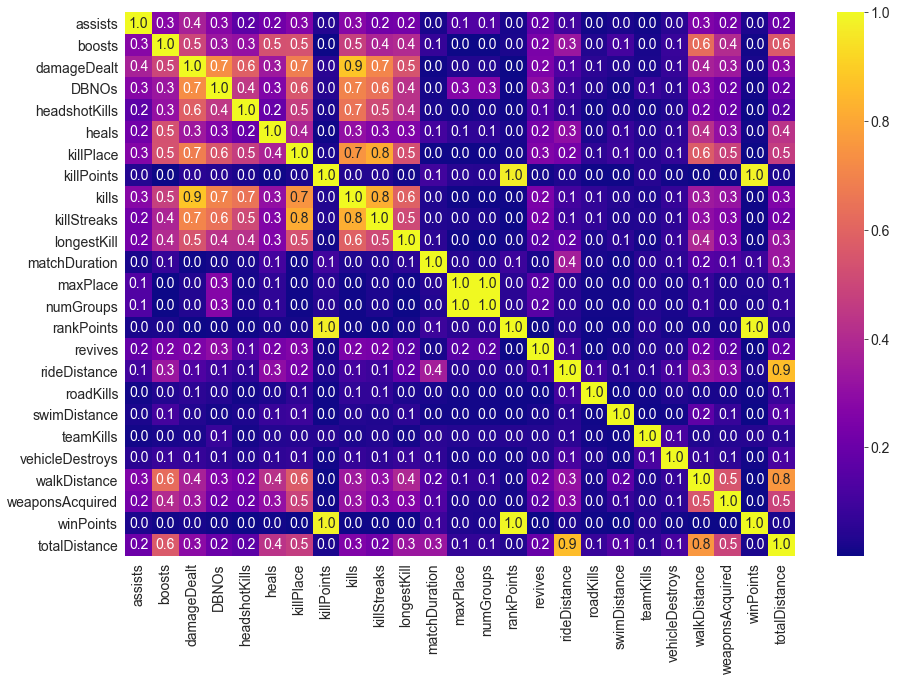

In [64]:
# Visualizing the above matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt="0.1f", cmap="plasma")
plt.show()

### We can notice that we have few features that are correlated with others. This may affect our model predictions, so we can drop these

#### Handling highly correlated features

In [65]:
# Getting the upper triangluar matrix of correlated data
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

assists    boosts  damageDealt     DBNOs  headshotKills  \
assists              NaN  0.273877     0.370764  0.270335       0.167058   
boosts               NaN       NaN     0.498693  0.331995       0.309446   
damageDealt          NaN       NaN          NaN  0.727878       0.584236   
DBNOs                NaN       NaN          NaN       NaN       0.446839   
headshotKills        NaN       NaN          NaN       NaN            NaN   
heals                NaN       NaN          NaN       NaN            NaN   
killPlace            NaN       NaN          NaN       NaN            NaN   
killPoints           NaN       NaN          NaN       NaN            NaN   
kills                NaN       NaN          NaN       NaN            NaN   
killStreaks          NaN       NaN          NaN       NaN            NaN   
longestKill          NaN       NaN          NaN       NaN            NaN   
matchDuration        NaN       NaN          NaN       NaN            NaN   
maxPlace             NaN       NaN          NaN       NaN            NaN   
numGroups            NaN       NaN          NaN       NaN            NaN   
rankPoints           NaN       NaN          NaN       NaN            NaN   
revives              NaN       NaN          NaN       NaN            NaN   
rideDistance         NaN       NaN          NaN       NaN            NaN   
roadKills            NaN       NaN          NaN       NaN            NaN   
swimDistance         NaN       NaN          NaN       NaN            NaN   
teamKills            NaN       NaN          NaN       NaN            NaN   
vehicleDestroys      NaN       NaN          NaN       NaN            NaN   
walkDistance         NaN       NaN          NaN       NaN            NaN   
weaponsAcquired      NaN       NaN          NaN       NaN            NaN   
winPoints            NaN       NaN          NaN       NaN            NaN   
totalDistance        NaN       NaN          NaN       NaN            NaN   

                    heals  killPlace  killPoints     kills  killStreaks  \
assists          0.216350   0.263842    0.037238  0.277233     0.215538   
boosts           0.534953   0.538915    0.004017  0.475810     0.382538   
damageDealt      0.338399   0.683135    0.048324  0.875324     0.704483   
DBNOs            0.256803   0.552813    0.039999  0.698307     0.642088   
headshotKills    0.193149   0.470778    0.021273  0.652277     0.510044   
heals                 NaN   0.378549    0.004400  0.306119     0.260302   
killPlace             NaN        NaN    0.020274  0.746275     0.809804   
killPoints            NaN        NaN         NaN  0.033275     0.034376   
kills                 NaN        NaN         NaN       NaN     0.816634   
killStreaks           NaN        NaN         NaN       NaN          NaN   
longestKill           NaN        NaN         NaN       NaN          NaN   
matchDuration         NaN        NaN         NaN       NaN          NaN   
maxPlace              NaN        NaN         NaN       NaN          NaN   
numGroups             NaN        NaN         NaN       NaN          NaN   
rankPoints            NaN        NaN         NaN       NaN          NaN   
revives               NaN        NaN         NaN       NaN          NaN   
rideDistance          NaN        NaN         NaN       NaN          NaN   
roadKills             NaN        NaN         NaN       NaN          NaN   
swimDistance          NaN        NaN         NaN       NaN          NaN   
teamKills             NaN        NaN         NaN       NaN          NaN   
vehicleDestroys       NaN        NaN         NaN       NaN          NaN   
walkDistance          NaN        NaN         NaN       NaN          NaN   
weaponsAcquired       NaN        NaN         NaN       NaN          NaN   
winPoints             NaN        NaN         NaN       NaN          NaN   
totalDistance         NaN        NaN         NaN       NaN          NaN   

                 longestKill  matchDuration  maxPlace  numGroups  rankPoints  \
assists  

### We got the upper triangluar matrix, now we only need to select the features that are highly correlated with each other

In [66]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)] # Keeping the threshold value as 0.6
to_drop

['kills',
 'killStreaks',
 'numGroups',
 'rankPoints',
 'winPoints',
 'totalDistance']

In [67]:
X.drop(X[to_drop + ["Id", "groupId", "matchId"]], axis=1, inplace=True)
X.head()

assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        0       0         0.00      0              0      0         60   
1        0       0        91.47      0              0      0         57   
2        1       0        68.00      0              0      0         47   
3        0       0        32.90      0              0      0         75   
4        0       0       100.00      0              0      0         45   

   killPoints  longestKill  matchDuration matchType  maxPlace  revives  \
0        1241         0.00           1306     squad        28        0   
1           0         0.00           1777     squad        26        0   
2           0         0.00           1318       duo        50        0   
3           0         0.00           1436     squad        31        0   
4           0        58.53           1424      solo        97        0   

   rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
0        0.0000          0          0.00          0                0   
1        0.0045          0         11.04          0                0   
2        0.0000          0          0.00          0                0   
3        0.0000          0          0.00          0                0   
4        0.0000          0          0.00          0                0   

   walkDistance  weaponsAcquired  
0        244.80                1  
1       1434.00                5  
2        161.80                2  
3        202.70                3  
4         49.75                2

### We can also drop the Id columns as they are unique and won't contribute that much to our model training /predictions

In [68]:
test_df.drop(to_drop + ["Id", "groupId", "matchId"], axis=1, inplace=True)

### Splitting the data into train and validation test.

In [69]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(pd.concat([X, y], axis=1), test_size=0.2, random_state=42)
print("Size of training set:", train.shape)
print("Size of validation set:", val.shape)

Size of training set: (3461649, 21)
Size of validation set: (865413, 21)


In [70]:
train_inputs, train_target = train.drop("winPlacePerc", axis=1), train["winPlacePerc"]
val_inputs, val_target = val.drop("winPlacePerc", axis=1), val["winPlacePerc"]

In [71]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

#### Scaling numeric values

In [72]:
# Scaling numeric values using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

In [73]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

#### Handling categorical columns

In [74]:
print(f"There are {train_inputs['matchType'].nunique()} different Match types in the dataset.")

There are 3 different Match types in the dataset.


In [75]:
# We can one-hot encode these
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(train_df[["matchType"]])

OneHotEncoder(handle_unknown='ignore')

In [76]:
encoded_cols = list(encoder.get_feature_names(["matchType"]))
encoded_cols

['matchType_duo', 'matchType_solo', 'matchType_squad']

In [77]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[["matchType"]]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs[["matchType"]]).toarray()
test_df[encoded_cols] = encoder.transform(test_df[["matchType"]]).toarray()

In [78]:
train_inputs.drop("matchType", axis=1, inplace=True)
val_inputs.drop("matchType", axis=1, inplace=True)
test_df.drop("matchType", axis=1, inplace=True)

In [79]:
train_inputs.head()

assists    boosts  damageDealt     DBNOs  headshotKills  heals  \
1501198  0.000000  0.000000     0.018463  0.037736            0.0  0.000   
61568    0.000000  0.060606     0.005217  0.000000            0.0  0.075   
3953541  0.000000  0.000000     0.015686  0.000000            0.0  0.000   
4199358  0.000000  0.000000     0.015686  0.018868            0.0  0.000   
1847195  0.058824  0.000000     0.000000  0.000000            0.0  0.000   

         killPlace  killPoints  longestKill  matchDuration  maxPlace  \
1501198       0.19    0.541014     0.004430       0.587452  0.285714   
61568         0.43    0.000000     0.000000       0.593631  0.438776   
3953541       0.40    0.000000     0.005182       0.631179  0.469388   
4199358       0.65    0.000000     0.000000       0.598859  0.448980   
1847195       0.61    0.527189     0.000000       0.586502  0.306122   

          revives  rideDistance  roadKills  swimDistance  teamKills  \
1501198  0.000000      0.000000        0.0           0.0        0.0   
61568    0.000000      0.020215        0.0           0.0        0.0   
3953541  0.000000      0.000000        0.0           0.0        0.0   
4199358  0.076923      0.000000        0.0           0.0        0.0   
1847195  0.000000      0.000000        0.0           0.0        0.0   

         vehicleDestroys  walkDistance  weaponsAcquired  matchType_duo  \
1501198              0.0      0.005807         0.008475            0.0   
61568                0.0      0.088285         0.029661            1.0   
3953541              0.0      0.008177         0.012712            1.0   
4199358              0.0      0.004302         0.008475            1.0   
1847195              0.0      0.018115         0.012712            0.0   

         matchType_solo  matchType_squad  
1501198             0.0              1.0  
61568               0.0              0.0  
3953541             0.0              0.0  
4199358             0.0              0.0  
1847195             0.0              1.0

In [80]:
train_target.head()

1501198    0.2069
61568      0.8864
3953541    0.3191
4199358    0.3778
1847195    0.3871
Name: winPlacePerc, dtype: float64

## 4. Model selection, training & prediction

### Since we need to predict a continous value, we can consider using a regression model.

#### Model to consider

- Linear Regressor

- DecisionTree Regressor

- Random Forest Regressor

- Support Vector Regressor

### 4.1 Linear Regressor

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
linear_model = LinearRegression(n_jobs=-1, fit_intercept=True)
linear_model.fit(train_inputs, train_target) # The LinearRegression model does not have mucb hyperparameters to tune.

LinearRegression(n_jobs=-1)

In [83]:
linear_model.coef_

array([ 3.20789876e-01,  4.69253345e-01, -5.82080957e-01, -1.40440556e+00,
       -7.99382029e-01,  1.28380176e-01, -4.43224291e-01, -3.01359916e-03,
       -1.34677074e-01, -3.52956983e-01,  5.74486212e-01,  4.36346102e-01,
        7.62063049e-01, -3.52220268e-01,  3.39958237e-01, -8.12124029e-02,
       -1.68798839e-02,  3.29314110e+00,  3.69085535e+00, -3.31718014e+11,
       -3.31718014e+11, -3.31718014e+11])

In [84]:
linear_model.score(train_inputs, train_target)

0.8029709736565517

#### Looks like our Linear model was able to learn the patterns in the data and got a respectable score of 0.80

In [85]:
linear_train_preds = linear_model.predict(train_inputs)

In [86]:
# Let's check how our model performs on validation set
linear_model.score(val_inputs, val_target)

0.8025895178081859

#### It seems that our model has recognized the patterns well on the data it has never seen before

In [87]:
linear_val_preds = linear_model.predict(val_inputs)
linear_val_preds

array([0.7197876 , 0.46868896, 0.40026855, ..., 0.41101074, 0.68780518,
       0.76953125])

In [88]:
mean_squared_error(val_target, linear_val_preds, squared=False)

0.13274839901135166

#### The RMSE is also acceptable.

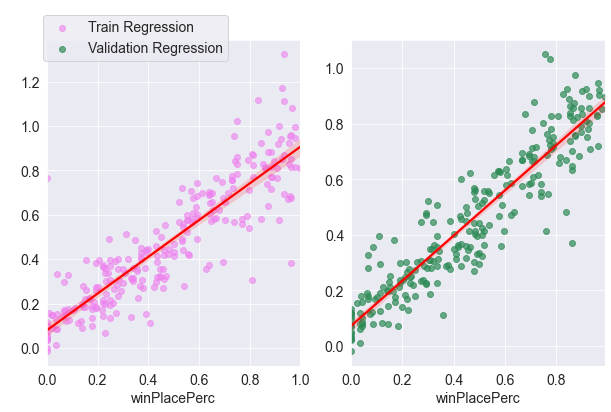

In [89]:
# Time to Visualize our linear model but since out dataset is very large we can use only few datapoints

fig, axes = plt.subplots(1, 2)
sns.regplot(train_target[:250], linear_train_preds[:250], color="red", 
            scatter_kws={"color": "violet", "alpha": 0.6}, ax=axes[0],
           label="Train Regression")
sns.regplot(val_target[:250], linear_val_preds[:250], color="red", 
            scatter_kws={"color": "seagreen", "alpha": 0.7}, ax=axes[1], 
           label="Validation Regression")

fig.legend(loc=(0.07, 0.85))
plt.show()

### Our linear model was able to fit a respectable regression line.

Since we will be visualizing the predictions lets define a separate function for that

In [90]:
def visualize_error_predictions(train_preds, val_preds):
    """Plots the Train vs Validation errors and 
    Actual vs Predicted datapoints"""
    fig, axes = plt.subplots(1, 3, figsize=(25, 10))

    train_error = (train_target - train_preds)[:500]
    val_error = (val_target - val_preds)[:500]

    axes[0].scatter(train_error, range(500), color="green", 
                alpha=0.7, label="Train", marker="*")
    axes[0].scatter(val_error, range(500), alpha=0.7, color="royalblue", label="Validation")
    axes[1].plot(range(100), train_target[:100], alpha=0.65, color="purple", label="Train Target")
    axes[1].plot(range(100), train_preds[:100], alpha=0.65, color="red", label="Predicted")
    axes[2].plot(range(100), val_target[:100], alpha=0.65, label="Val. Target", color="cyan")
    axes[2].plot(range(100), val_preds[:100], alpha=0.65, 
                 label="Predicted", color="green")

    axes[0].set_title("Train Error vs Validation Error", fontdict={"size":23, "weight": "bold"})
    axes[0].set_xlabel("Error", fontdict={"size":20})
    axes[0].set_ylabel("Data Points", fontdict={"size":20})
    axes[0].legend()

    axes[1].set_title("Train Targets vs Predicted Targets", fontdict={"size":23, "weight": "bold"})
    axes[1].set_xlabel("Data Points", fontdict={"size":20})
    axes[1].set_ylabel("Predictions", fontdict={"size":20})
    axes[1].legend()

    axes[2].set_title("Validation Targets vs Predicted Targets", fontdict={"size":23, "weight": "bold"})
    axes[2].set_xlabel("Data Points", fontdict={"size":20})
    axes[2].set_ylabel("Predictions", fontdict={"size":20})
    axes[2].legend()
    plt.show()

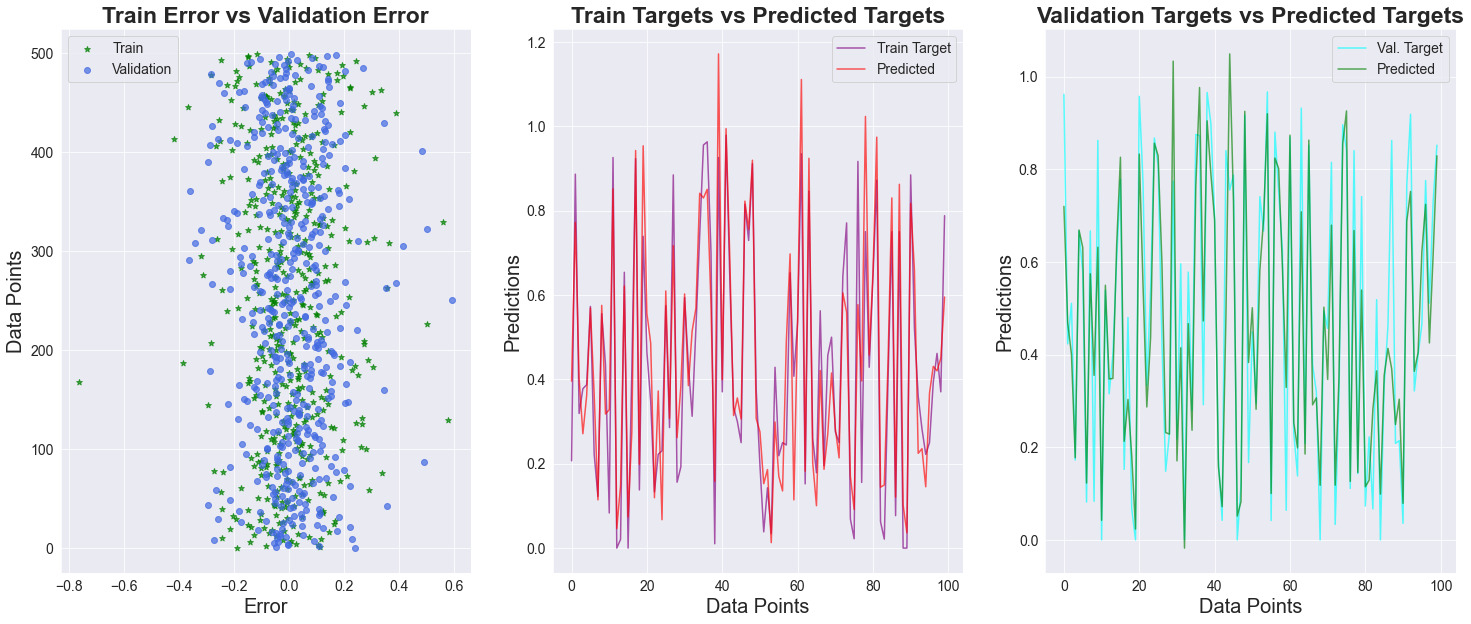

In [91]:
visualize_error_predictions(linear_train_preds, linear_val_preds)

### From the above visualiztion we can conclude that our Linear model performed identical on both the training as well as the validation test

#### Linear Model Summary:

- Performed identically well on both Training and Validation data

- Training accuracy: **0.8029**, Validation Accuracy: **0.8025**

- RMSE Value of Validation set: **0.1327**

### 4.2 Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [93]:
# Training decision tree with default hyper params
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(train_inputs, train_target)

DecisionTreeRegressor()

In [94]:
tree_train_preds = tree_regressor.predict(train_inputs)
tree_train_preds

array([0.2069, 0.8864, 0.3191, ..., 0.6129, 0.2857, 0.3103])

### Let's check the model score on training set

In [95]:
tree_regressor.score(train_inputs, train_target)

0.9999963902361221

### And our Decision Tree model is close to being 100 %. accurate but is it the case since Decision Trees are famous for overfitting the data and giving high training set scores.

In [96]:
# Checking score on validation set
tree_regressor.score(val_inputs, val_target)

0.8321515390515942

### So looks like our model has definitely overfit the training data as it only scores around 83% on validation set.

Let's visualize both the training and validation predictions

In [97]:
tree_val_preds = tree_regressor.predict(val_inputs)
tree_val_preds

array([0.7692, 0.5556, 0.4783, ..., 0.5185, 0.9565, 0.7308])

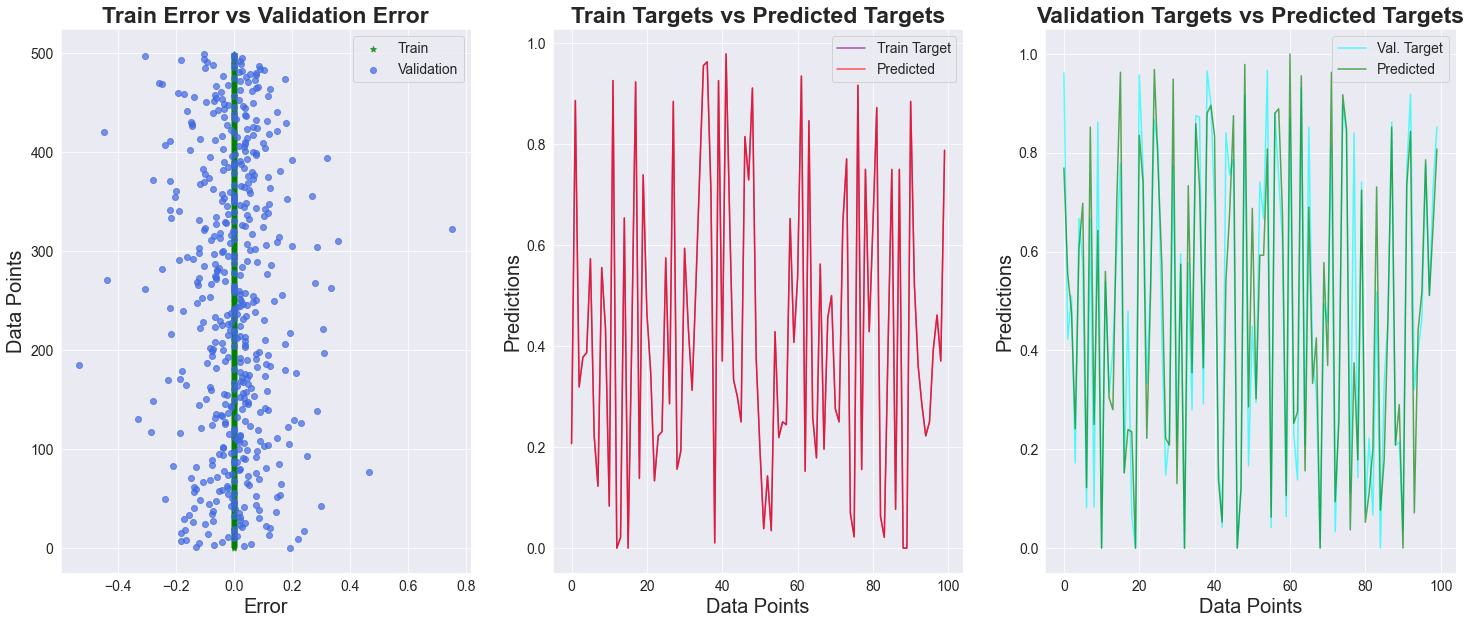

In [98]:
visualize_error_predictions(tree_train_preds, tree_val_preds)

### The straight line means that our model is making near perfect predictions on the training set (the error is almost 0) but fails to do so on validation set (represented by scattered dots). Also it may look like that there is just a single line plotted but actually the predicted line has overlapped on the actual line as out DT has overfitted out data.

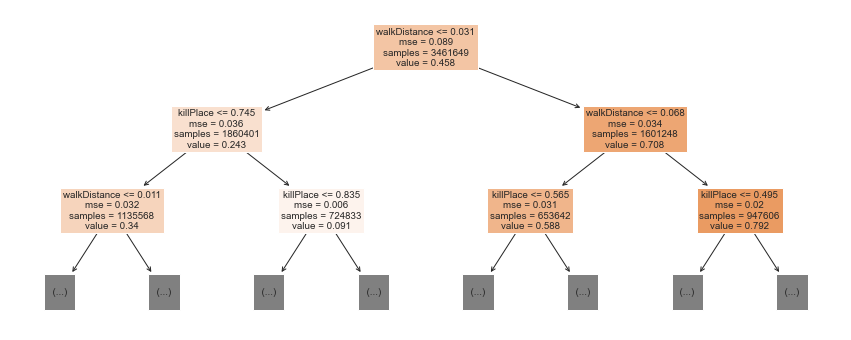

In [99]:
# Visualize the structure of our tree
plt.figure(figsize=(15, 6))
plot_tree(tree_regressor, feature_names=train_inputs.columns, max_depth=2, filled=True)
plt.show()

### Let's take a look at the importance value that our DT has assigned to each feature

In [100]:
importance_df = pd.DataFrame(
                             {
                              "Feature": train_inputs.columns, 
                              "Importance": tree_regressor.feature_importances_
                             }
                            ).sort_values("Importance", ascending=False)
importance_df

Feature  Importance
17     walkDistance    0.695937
6         killPlace    0.178491
10         maxPlace    0.027384
9     matchDuration    0.022748
8       longestKill    0.016539
2       damageDealt    0.011270
12     rideDistance    0.008489
1            boosts    0.007831
7        killPoints    0.005971
18  weaponsAcquired    0.005904
3             DBNOs    0.005348
5             heals    0.003946
20   matchType_solo    0.002040
0           assists    0.001810
4     headshotKills    0.001677
11          revives    0.001312
14     swimDistance    0.001196
19    matchType_duo    0.000799
21  matchType_squad    0.000692
15        teamKills    0.000403
16  vehicleDestroys    0.000129
13        roadKills    0.000082

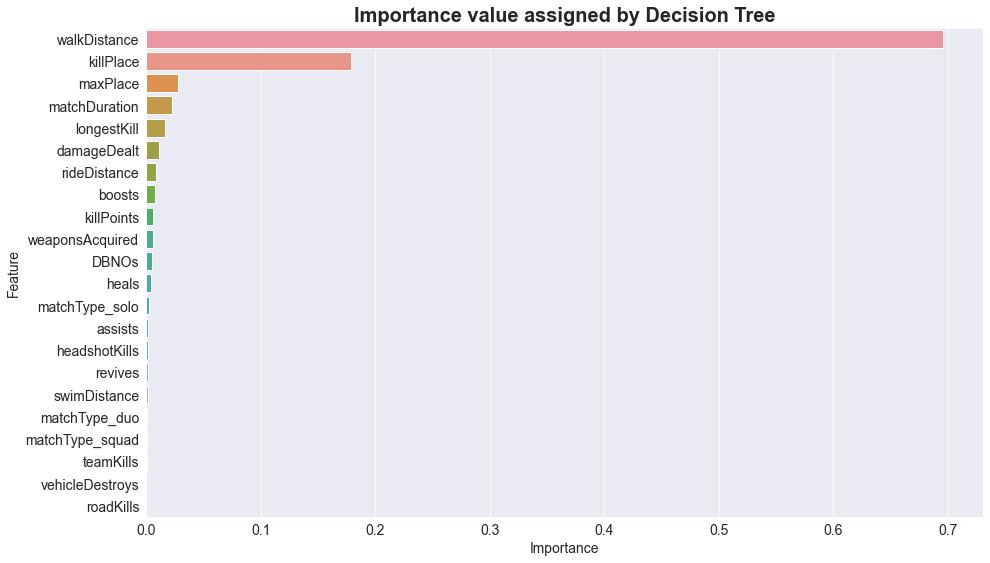

In [101]:
# Visualizing the feature importance
plt.figure(figsize=(15, 9))
sns.barplot(x="Importance", y="Feature", data=importance_df, orient="h")
plt.title("Importance value assigned by Decision Tree", fontdict={"size":20, "weight": "bold"})
plt.show()

### Let's perform some HyperParameters tuning so as to improve our model performance.

Going through the official scikit-learn docs on [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), the following hyperparamters can be tuned

- max_depth

- max_leaf_nodes

- splitter

- max_features

### Manually searching for best hyper-params can be a tedious task. So we can use a technique called [GridSearch](https://scikit-learn.org/stable/modules/grid_search.html) cross-validation to find the best hyper-params value.

In [102]:
from sklearn.model_selection import GridSearchCV

In [106]:
params = {
    "max_depth": np.random.randint(3, 11, size=5),
    "max_leaf_nodes": np.random.randint(0, 15, size=5),
    "splitter": ["best", "random"],
    "max_features": ["auto","log2","sqrt",None]
}

tuning_model = GridSearchCV(tree_regressor, param_grid=params, 
                            scoring='neg_mean_squared_error', cv=3, 
                            verbose=3)

#### Our tuning model has been initialized. We need to train it on the training data so that it can calculate the best hyper-params for our DT model.

In [107]:
%%time
tuning_model.fit(train_inputs, train_target)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=8, splitter=best;, score=-0.018 total time=  12.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=8, splitter=best;, score=-0.018 total time=   8.8s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=8, splitter=best;, score=-0.018 total time=   8.8s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=8, splitter=random;, score=-0.026 total time=   4.0s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=8, splitter=random;, score=-0.020 total time=   3.9s
[CV 3/3] END max_depth=8, max_features=auto, max_leaf_nodes=8, splitter=random;, score=-0.030 total time=   3.8s
[CV 1/3] END max_depth=8, max_features=auto, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.2s
[CV 2/3] END max_depth=8, max_features=auto, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.2s
[CV 3/3] END max_depth=8, max_features=au

[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=best;, score=-0.048 total time=   2.1s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=best;, score=-0.025 total time=   2.6s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random;, score=-0.065 total time=   1.0s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random;, score=-0.081 total time=   1.0s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=5, splitter=random;, score=-0.052 total time=   1.1s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=13, splitter=best;, score=-0.031 total time=   2.7s
[CV 2/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=13, splitter=best;, score=-0.023 total time=   3.1s
[CV 3/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=13, splitter=best;, score=-0.032 total time=   2.9s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=13, splitter=random;, score=-0.049 total ti

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=12, splitter=best;, score=-0.016 total time=   9.5s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=12, splitter=random;, score=-0.030 total time=   3.9s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=12, splitter=random;, score=-0.034 total time=   3.7s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=12, splitter=random;, score=-0.021 total time=   4.1s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=best;, score=-0.047 total time=   2.4s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=best;, score=-0.079 total time=   1.6s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=best;, score=-0.032 total time=   2.4s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=random;, score=-0.065 total time=   1.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=random;, score=-0.076 total 

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=random;, score=-0.027 total time=   5.1s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=random;, score=-0.030 total time=   5.4s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=random;, score=-0.019 total time=   4.6s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=best;, score=-0.021 total time=   7.6s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=best;, score=-0.021 total time=   7.6s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=best;, score=-0.022 total time=   7.1s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=random;, score=-0.041 total time=   2.7s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=random;, score=-0.040 total time=   2.9s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=random;, score=-0.053 total

[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=13, splitter=random;, score=-0.043 total time=   1.2s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=13, splitter=random;, score=-0.033 total time=   1.3s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=12, splitter=best;, score=-0.026 total time=   2.9s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=12, splitter=best;, score=-0.026 total time=   2.7s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=12, splitter=best;, score=-0.024 total time=   2.9s
[CV 1/3] END max_depth=8, max_features=log2, max_leaf_nodes=12, splitter=random;, score=-0.044 total time=   1.5s
[CV 2/3] END max_depth=8, max_features=log2, max_leaf_nodes=12, splitter=random;, score=-0.053 total time=   1.2s
[CV 3/3] END max_depth=8, max_features=log2, max_leaf_nodes=12, splitter=random;, score=-0.078 total time=   1.1s
[CV 1/3] END max_depth=8, max_features=sqrt, max_leaf_nodes=8, splitter=best;, score=-0.032 to

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=8, splitter=random;, score=-0.022 total time=   4.4s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.1s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.1s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.2s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=13, splitter=random;, score=-0.020 total time=   4.4s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=13, splitter=random;, score=-0.036 total time=   4.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=13, splitter=random;, score=-0.022 total time=   4.2s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=5, splitter=best;, score=-0.021 total time=   7.5s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=5, splitter=best;, score=-0.021 total 

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=13, splitter=best;, score=-0.040 total time=   2.3s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=13, splitter=best;, score=-0.019 total time=   3.2s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=13, splitter=best;, score=-0.020 total time=   2.8s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=13, splitter=random;, score=-0.067 total time=   1.1s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=13, splitter=random;, score=-0.050 total time=   1.2s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=13, splitter=random;, score=-0.055 total time=   1.4s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=12, splitter=best;, score=-0.025 total time=   2.8s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=12, splitter=best;, score=-0.031 total time=   3.1s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=12, splitter=best;, score=-0.031 total

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=best;, score=-0.027 total time=   2.1s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=best;, score=-0.029 total time=   2.6s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=random;, score=-0.077 total time=   1.1s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=random;, score=-0.055 total time=   1.2s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=8, splitter=random;, score=-0.051 total time=   1.3s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=13, splitter=best;, score=-0.025 total time=   2.8s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=13, splitter=best;, score=-0.019 total time=   3.2s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=13, splitter=best;, score=-0.028 total time=   2.7s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=13, splitter=random;, score=-0.040 total ti

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=best;, score=-0.022 total time=   7.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=random;, score=-0.046 total time=   2.7s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=random;, score=-0.026 total time=   3.1s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=5, splitter=random;, score=-0.042 total time=   2.7s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.1s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.3s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=best;, score=-0.016 total time=  10.2s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=random;, score=-0.024 total time=   4.4s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=13, splitter=random;, score=-0.027 total

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([8, 7, 8, 7, 7]),
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': array([ 8, 13,  5, 13, 12]),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

### The Grid Search cross-validation took about 45 mins to complete, but this time may vary from machine to machine and size of dataset. Now we can take a look at the best hyper-params that the CV has retained for our DT model.

In [108]:
# Best parameters
best_hyper_params = tuning_model.best_params_
best_hyper_params

{'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 13,
 'splitter': 'best'}

In [109]:
# Best model score
tuning_model.best_score_

-0.015906173854418556

#### Now we can train a new DT model with the best hyper-params

In [110]:
hyper_tuned_dt = DecisionTreeRegressor(**best_hyper_params)
hyper_tuned_dt.fit(train_inputs, train_target)

DecisionTreeRegressor(max_depth=8, max_features='auto', max_leaf_nodes=13)

In [111]:
hyper_model_train_preds = hyper_tuned_dt.predict(train_inputs)
hyper_model_train_preds

array([0.22978491, 0.78372291, 0.22978491, ..., 0.61935316, 0.43826454,
       0.43826454])

In [112]:
# Checking the score of hyper-tuned model on training set
hyper_tuned_dt.score(train_inputs, train_target)

0.8201063853733906

### We can see that the training accuracy dropped significantly, from almost 100% it dropped down to about 82%. Let's check if there is any change in the validation set score or not.

In [113]:
# Checking the score of hyper-tuned model on training set
hyper_model_val_preds = hyper_tuned_dt.predict(val_inputs)
hyper_tuned_dt.score(val_inputs, val_target)

0.8193361928929022

### The score on the validation set is as good as training set. So looks like hyper-param tuning did help in improving the overall preformance of out model. 

### Let's check if the feature importance changed or not

In [114]:
importance_df_hyper = pd.DataFrame(
                             {
                              "Feature": train_inputs.columns, 
                              "Importance": hyper_tuned_dt.feature_importances_
                             }
                            ).sort_values("Importance", ascending=False)
importance_df_hyper

Feature  Importance
17     walkDistance    0.816429
6         killPlace    0.168499
8       longestKill    0.005605
10         maxPlace    0.005499
1            boosts    0.003968
0           assists    0.000000
13        roadKills    0.000000
20   matchType_solo    0.000000
19    matchType_duo    0.000000
18  weaponsAcquired    0.000000
16  vehicleDestroys    0.000000
15        teamKills    0.000000
14     swimDistance    0.000000
11          revives    0.000000
12     rideDistance    0.000000
9     matchDuration    0.000000
7        killPoints    0.000000
5             heals    0.000000
4     headshotKills    0.000000
3             DBNOs    0.000000
2       damageDealt    0.000000
21  matchType_squad    0.000000

### Walk distance still has the highest importance but order of some features has been changed. A plot will help us understand it in a better way

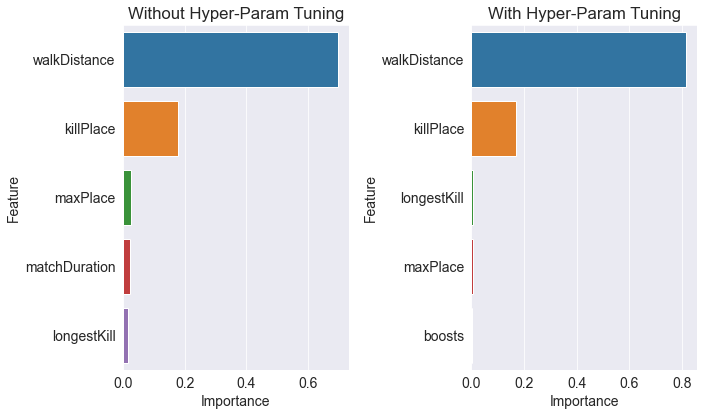

In [115]:
fig, axes = plt.subplots(1, 2)

sns.barplot(x="Importance", y="Feature", data=importance_df.head(), orient="h", ax=axes[0])
sns.barplot(x="Importance", y="Feature", data=importance_df_hyper.head(), orient="h", ax=axes[1])
axes[0].set_title("Without Hyper-Param Tuning")
axes[1].set_title("With Hyper-Param Tuning")
fig.tight_layout()
plt.show()

### So both walkDistance and killPlace remained highly valued features .

In [116]:
mean_squared_error(val_target, hyper_model_val_preds)

0.016127220824046287

#### Visulizing error of our Hyper Tuned model

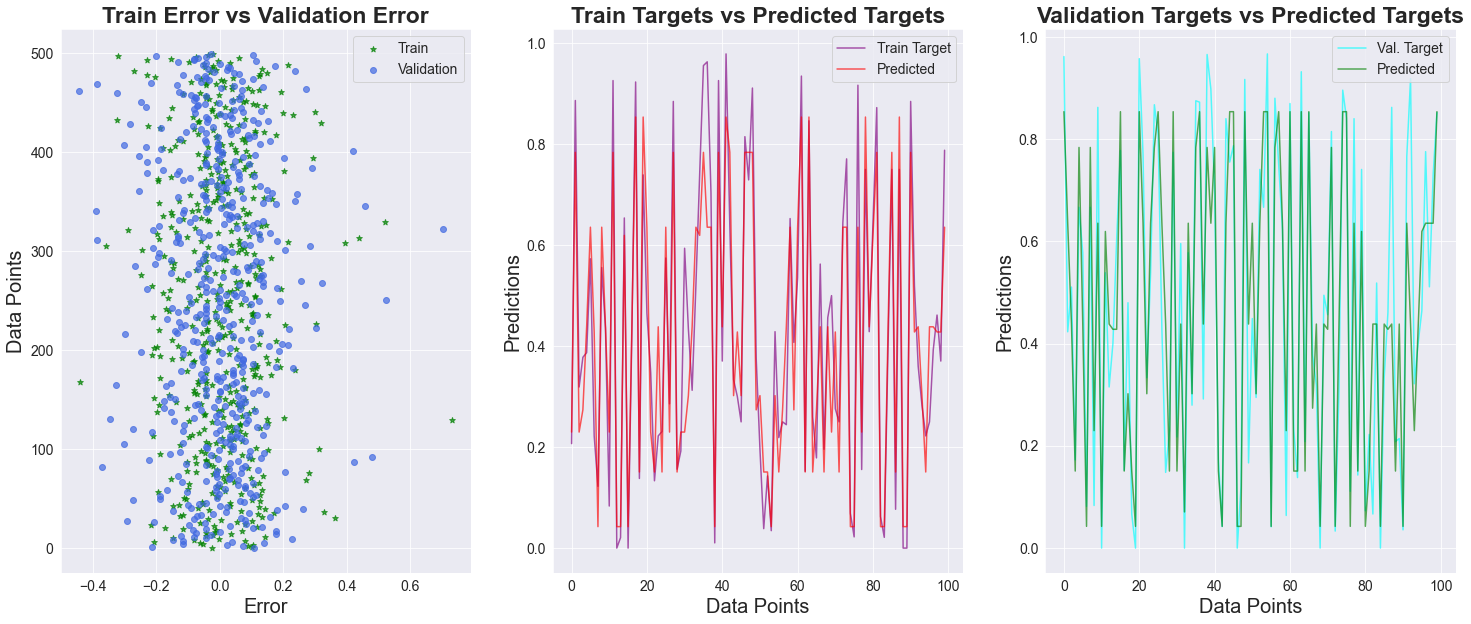

In [117]:
visualize_error_predictions(hyper_model_train_preds, hyper_model_val_preds)

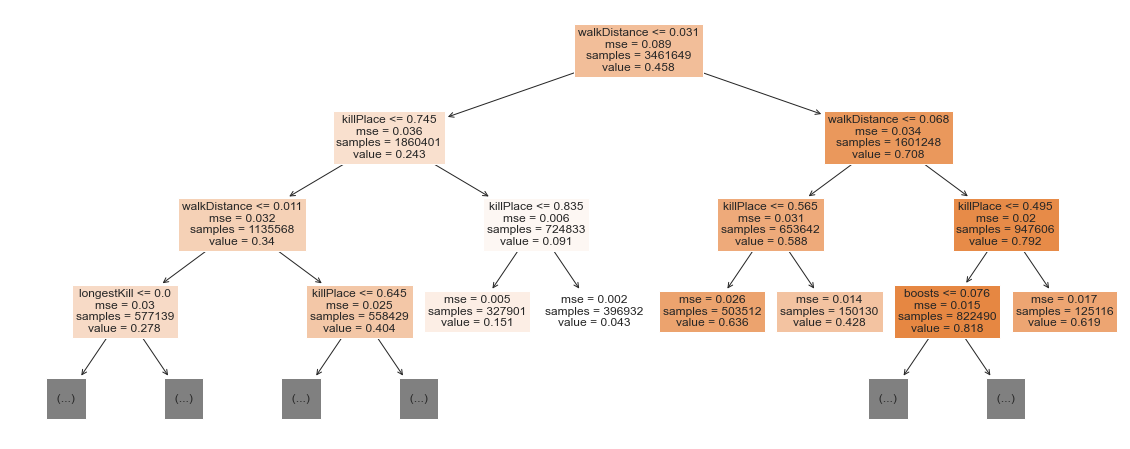

In [118]:
# Visualizing structure of our hyper tuned tree
plt.figure(figsize=(20, 8))
plot_tree(hyper_tuned_dt, max_depth=3, filled=True, 
          feature_names=train_inputs.columns, fontsize=12)
plt.show()

#### DT Regressor Model Summary:

- It is more prone to Overfitting.

- Performed identically well on both Training and Validation data after HyperParam tuning

- Training accuracy: **0.9999**, Validation Accuracy: **0.8319** (Without Hyper Param tuning)

- Training accuracy: **0.8201**, Validation Accuracy: **0.8193** (With Hyper Param tuning)

- RMSE Value of Validation set: **0.0161**

### 4.3 Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
# Training the random forest with default hyper-params
rf_regressor = RandomForestRegressor(n_estimators=10, n_jobs=-1)
rf_regressor.fit(train_inputs, train_target)

RandomForestRegressor(n_estimators=10, n_jobs=-1)

Note: n_estimators has been set to 10 as it took more than 45 mins to train the model with default value set to 100.

### Model score on training set

In [121]:
rf_regressor.score(train_inputs, train_target)

0.9837434136339951

### So our RandomForest model is 98% accurate on training data. But we cannot conclude that it is the best model.

### Let's check the score on validation set.

In [122]:
rf_regressor.score(val_inputs, val_target)

0.9086192844969813

### That's interesting! Our RF Model scores around 91% on the data that it has never encountered before. So it seems that our model has not completely overfit the data. However, with some hyper-param tuning we can further improve our model performance.

### Visualizing feature importance (without hyper param tuning)

In [123]:
# Visualizing error in predictions (without hyper param tuning)
importance_df_hyper = pd.DataFrame(
                             {
                              "Feature": train_inputs.columns, 
                              "Importance": rf_regressor.feature_importances_
                             }
                            ).sort_values("Importance", ascending=False)
importance_df_hyper

Feature  Importance
17     walkDistance    0.683189
6         killPlace    0.191143
10         maxPlace    0.028059
9     matchDuration    0.022563
8       longestKill    0.016848
2       damageDealt    0.011183
12     rideDistance    0.008580
1            boosts    0.007952
7        killPoints    0.005961
18  weaponsAcquired    0.005849
3             DBNOs    0.005074
5             heals    0.003987
0           assists    0.001870
4     headshotKills    0.001643
20   matchType_solo    0.001488
11          revives    0.001299
14     swimDistance    0.001191
19    matchType_duo    0.000752
21  matchType_squad    0.000745
15        teamKills    0.000399
16  vehicleDestroys    0.000137
13        roadKills    0.000089

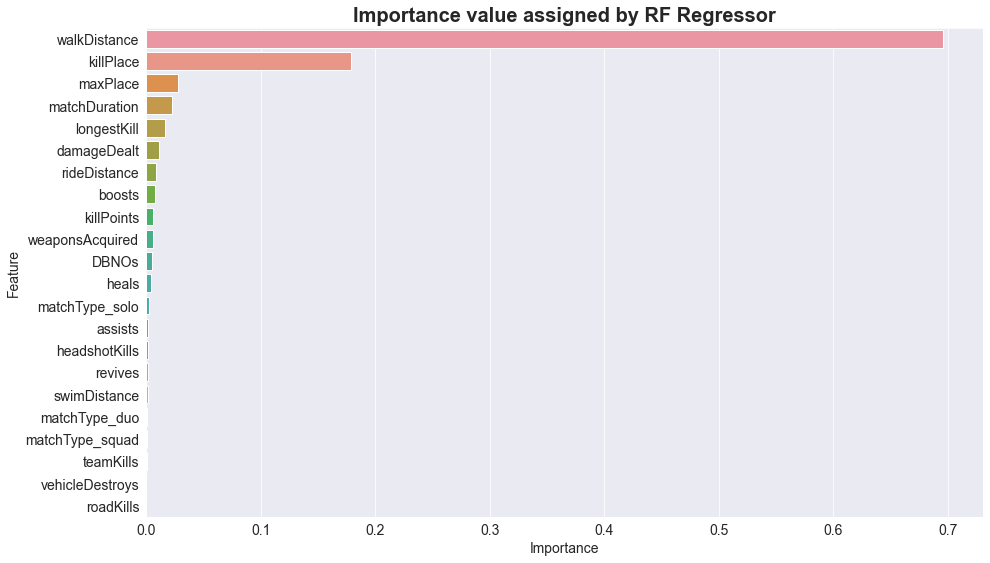

In [124]:
plt.figure(figsize=(15, 9))
sns.barplot(x="Importance", y="Feature", data=importance_df, orient="h")
plt.title("Importance value assigned by RF Regressor", fontdict={"size":20, "weight": "bold"})
plt.show()

In [125]:
rf_train_preds = rf_regressor.predict(train_inputs)
rf_val_preds = rf_regressor.predict(val_inputs)

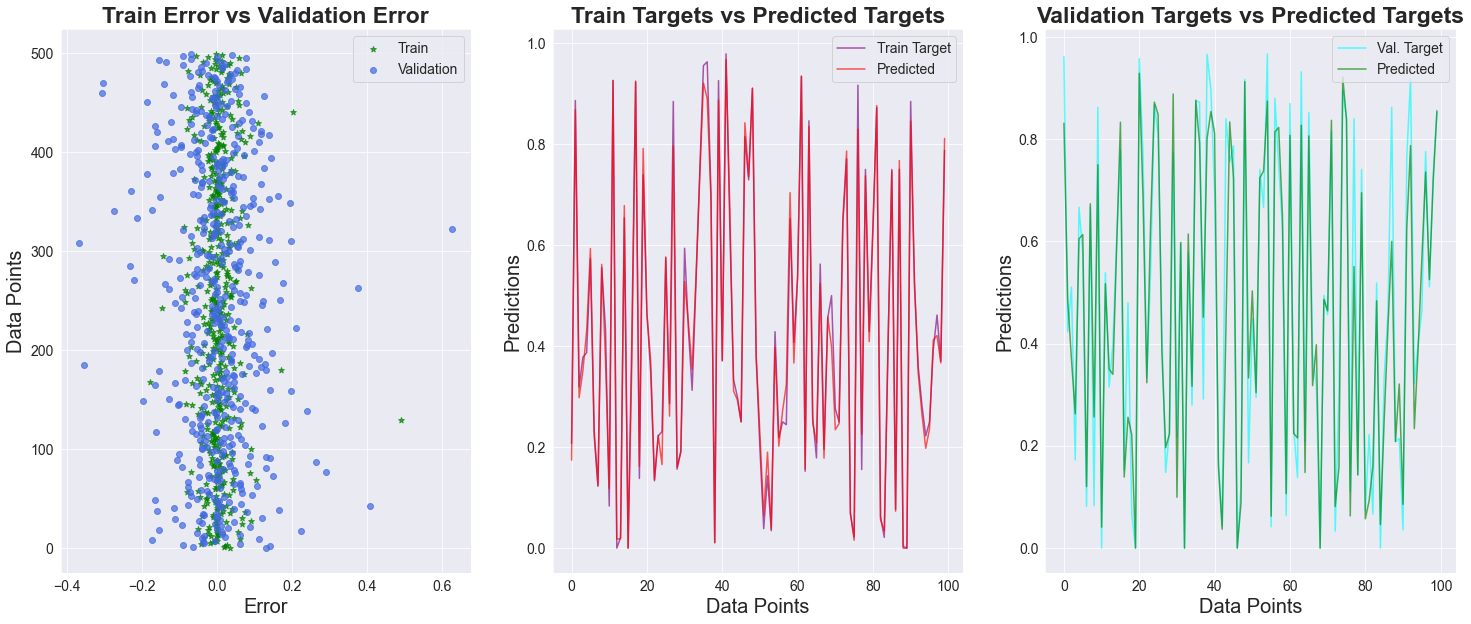

In [126]:
visualize_error_predictions(rf_train_preds, rf_val_preds)

### As we can see that the error on the training set is close to 0 where as on the validation set it is much more scattered through out the plot but majority of the data points are tending to 0.

### Let's perform some HyperParameters tuning so as to improve our model performance.


Going through the official scikit-learn docs on [Random Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#:~:text=A%20random%20forest%20regressor.,accuracy%20and%20control%20over%2Dfitting.), the following hyperparamters can be tuned

- n_estimators (we will set it to 10 so as to save some time but that does not mean that this is the optimal value)

- max_depth

- max_leaf_nodes

- max_features

### We can use the previous optimal hyper-params (excluding splitters) since GridSearch is computationally expensive and for RandomForest it may take more time.

In [127]:
best_hyper_params_rf = {key: best_hyper_params[key] for key in best_hyper_params if key != "splitter"}
best_hyper_params_rf

{'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 13}

In [128]:
hyper_tuned_rf = RandomForestRegressor(n_estimators=10, **best_hyper_params_rf)
hyper_tuned_rf.fit(train_inputs, train_target)

RandomForestRegressor(max_depth=8, max_leaf_nodes=13, n_estimators=10)

In [129]:
hyper_rf_train_preds = hyper_tuned_rf.predict(train_inputs)
hyper_rf_val_preds = hyper_tuned_rf.predict(val_inputs)

### It's time to check the score of our hyper param tuned model on both training as well as validation set.

In [130]:
hyper_tuned_rf.score(train_inputs, train_target)

0.8273719395484119

In [131]:
hyper_tuned_rf.score(val_inputs, val_target)

0.826617126492868

In [132]:
mean_squared_error(val_target, hyper_rf_val_preds)

0.015477277562846996

### Yet again! After hyper param tuning our RF model has identical scores on both training and validation set.

#### Time to visualize the errors and predictions

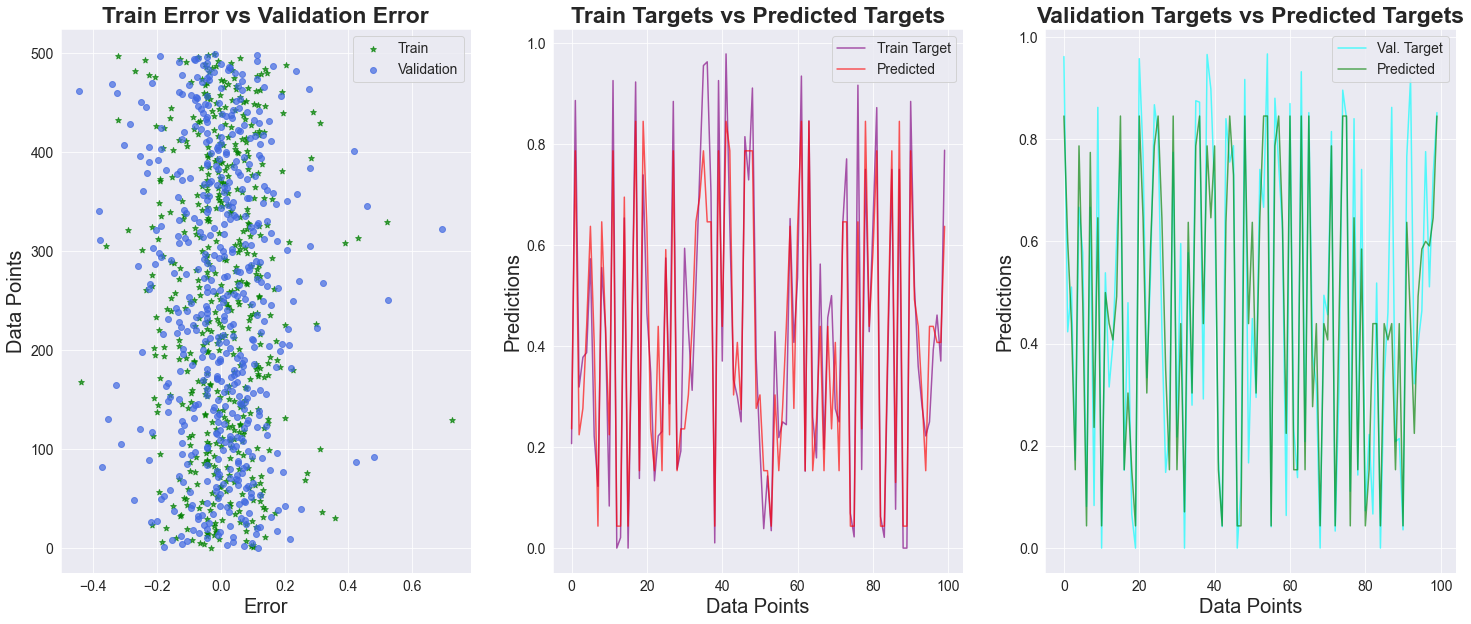

In [133]:
visualize_error_predictions(hyper_rf_train_preds, hyper_rf_val_preds)

### Let's check if there is any difference in feature importance after hyper param tuning.

In [134]:
importance_df_hyper = pd.DataFrame(
                             {
                              "Feature": train_inputs.columns, 
                              "Importance": hyper_tuned_rf.feature_importances_
                             }
                            ).sort_values("Importance", ascending=False)
importance_df_hyper

Feature  Importance
17     walkDistance    0.799595
6         killPlace    0.185510
8       longestKill    0.005779
10         maxPlace    0.005550
1            boosts    0.003565
0           assists    0.000000
13        roadKills    0.000000
20   matchType_solo    0.000000
19    matchType_duo    0.000000
18  weaponsAcquired    0.000000
16  vehicleDestroys    0.000000
15        teamKills    0.000000
14     swimDistance    0.000000
11          revives    0.000000
12     rideDistance    0.000000
9     matchDuration    0.000000
7        killPoints    0.000000
5             heals    0.000000
4     headshotKills    0.000000
3             DBNOs    0.000000
2       damageDealt    0.000000
21  matchType_squad    0.000000

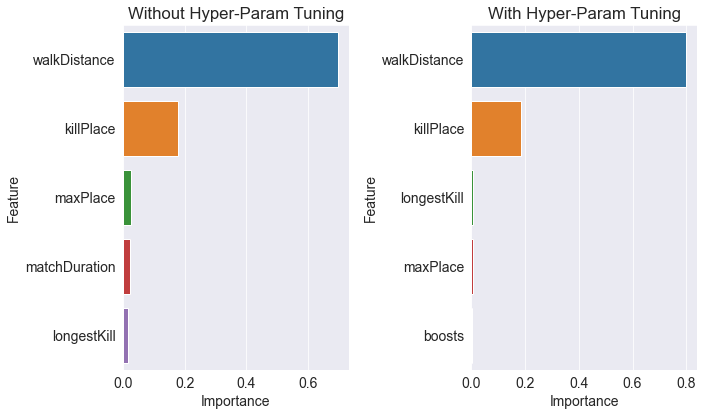

In [135]:
fig, axes = plt.subplots(1, 2)

sns.barplot(x="Importance", y="Feature", data=importance_df.head(), orient="h", ax=axes[0])
sns.barplot(x="Importance", y="Feature", data=importance_df_hyper.head(), orient="h", ax=axes[1])
axes[0].set_title("Without Hyper-Param Tuning")
axes[1].set_title("With Hyper-Param Tuning")
fig.tight_layout()
plt.show()

### Yes there is some change in the feature importance that can be noticed.

#### RF Regressor Model Summary:

- It is too prone to Overfitting but still manages to generalize the data better than DTs without hyper param tuning.

- Performed identically well on both Training and Validation data after HyperParam tuning

- Takes much more time to train.

- Training accuracy: **0.9837**, Validation Accuracy: **0.9085** (Without Hyper Param tuning)

- Training accuracy: **0.8273**, Validation Accuracy: **0.8266** (With Hyper Param tuning)

- RMSE Value of Validation set: **0.0154**

## Conclusion

### The following conclusion can be made from the above analysis

- walkDistance and killPoints remained the dominating features and largely impacted the predictions.

- All the 3 models performed well.

- In terms of reliability, RandomForest is the way to go.

- LinearRegression was faster than both DT and RF.

- RMSE of LinearRegression was much more than that of DT or RF.

- Hyperparameters tuning greatly reduced overfitting in DT and RF model.

- More features may lead to better accuracy score and predictions.

In [137]:
model_stats = {
    "Name": ["Linear Regression", "DecisionTree Regressor", "RandomForest Regressor"],
    "Accuracy on Training set (without Hyperparam tuning)": [0.8029, 0.9999, 0.9837],
    "Accuracy on Validation set (without Hyperparam tuning)": [0.8025, 0.8319, 0.9085],
    "Accuracy on Training set (with Hyperparam tuning)": [np.nan, 0.8233, 0.8303],
    "Accuracy on Validation set (with Hyperparam tuning)": [np.nan, 0.8273, 0.8266],
    "RMSE (of validation set)": [0.1327, 0.0158, 0.0154]
}

model_stats_df = pd.DataFrame(model_stats)
model_stats_df

Name  \
0       Linear Regression   
1  DecisionTree Regressor   
2  RandomForest Regressor   

   Accuracy on Training set (without Hyperparam tuning)  \
0                                             0.8029      
1                                             0.9999      
2                                             0.9837      

   Accuracy on Validation set (without Hyperparam tuning)  \
0                                             0.8025        
1                                             0.8319        
2                                             0.9085        

   Accuracy on Training set (with Hyperparam tuning)  \
0                                                NaN   
1                                             0.8233   
2                                             0.8303   

   Accuracy on Validation set (with Hyperparam tuning)  \
0                                                NaN     
1                                             0.8273     
2                                             0.8266     

   RMSE (of validation set)  
0                    0.1327  
1                    0.0158  
2                    0.0154

### Before winding up, we can save our model as well as other important objects so that we can use them later without performing all of the preprocessing and training again.

In [138]:
import joblib

In [139]:
objects_to_save = {
    "linear_model": linear_model,
    "tree_model": hyper_tuned_dt,
    "rf_model": hyper_tuned_rf,
    "input_cols": X.columns.tolist(),
    "target_cols": y,
    "numeric_cols": X.select_dtypes(np.number).columns.tolist(),
    "categorical_cols": ["matchType"],
    "scaler": scaler,
    "encoder": encoder
}

In [140]:
joblib.dump(objects_to_save, "pubg_predictions.joblib")

['pubg_predictions.joblib']